In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starship-price-dataset/starship_prices_dataset.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Define the path to the CSV file containing the data
path = '/kaggle/input/starship-price-dataset/starship_prices_dataset.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(path)

# Display the DataFrame to view the loaded data
df

Manufacturer Model     Class Fuel_Type  Color Region Condition  \
0                C     Z   Economy     Type3   Blue   West      Used   
1                D     Y   Economy     Type2  Green   West      Used   
2                A     Z     Sport     Type1  Green  North       New   
3                C     W    Luxury     Type1  Black  North       New   
4                C     W  Standard     Type2   Blue   West       New   
...            ...   ...       ...       ...    ...    ...       ...   
24995            B     W    Luxury     Type2    Red  South      Used   
24996            D     W    Luxury     Type2  Black   East      Used   
24997            C     Z   Economy     Type3    Red   West      Used   
24998            D     Y  Standard     Type2  Green   West      Used   
24999            C     Z  Standard     Type2   Blue  South      Used   

       Engine_Size       Mileage   Top_Speed       Weight     Length  \
0       109.113801  15321.918986  309.950786  5116.721783  19.915063   
1        99.262712  14102.670642  281.222018  4799.044954  18.859084   
2       101.710964  14519.624821  305.852171  4925.505271  19.440369   
3        20.578056   2618.682630   65.723124   933.552258   4.170078   
4        65.653734   9969.364616  215.346270  3286.661142  13.779453   
...            ...           ...         ...          ...        ...   
24995    32.332622   3662.781978   77.028893  1125.049660   4.634009   
24996    19.997165   3209.568073   58.200177  1085.289365   3.777870   
24997     7.681307   1119.245372   25.040660   546.122350   2.137906   
24998    27.498590   3411.483184   64.744509  1029.477871   3.967970   
24999    69.918008   9399.209756  187.633297  3212.982396  12.258351   

           Width    Height          Price  
0       9.966548  8.114772  103601.083501  
1       9.614170  7.588885   96503.312251  
2      10.032622  7.790285   98934.373443  
3       2.143011  1.577010   21244.557921  
4       6.924945  5.413935   70033.068720  
...          ...       ...            ...  
24995   2.662534  1.909422   24574.667341  
24996   2.285506  1.606860   23018.212663  
24997   0.780231  0.886478    7873.010996  
24998   2.034760  1.650329   21293.116302  
24999   6.318625  4.948001   62024.970203  

[25000 rows x 15 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Manufacturer  25000 non-null  object 
 1   Model         25000 non-null  object 
 2   Class         25000 non-null  object 
 3   Fuel_Type     25000 non-null  object 
 4   Color         25000 non-null  object 
 5   Region        25000 non-null  object 
 6   Condition     25000 non-null  object 
 7   Engine_Size   25000 non-null  float64
 8   Mileage       25000 non-null  float64
 9   Top_Speed     25000 non-null  float64
 10  Weight        25000 non-null  float64
 11  Length        25000 non-null  float64
 12  Width         25000 non-null  float64
 13  Height        25000 non-null  float64
 14  Price         25000 non-null  float64
dtypes: float64(8), object(7)
memory usage: 2.9+ MB


In [5]:
df.describe(include='all')

Manufacturer  Model    Class Fuel_Type  Color Region Condition  \
count         25000  25000    25000     25000  25000  25000     25000   
unique            4      4        4         3      4      4         2   
top               A      X  Economy     Type1   Blue  North      Used   
freq           6314   6302     6356      8424   6288   6377     12554   
mean            NaN    NaN      NaN       NaN    NaN    NaN       NaN   
std             NaN    NaN      NaN       NaN    NaN    NaN       NaN   
min             NaN    NaN      NaN       NaN    NaN    NaN       NaN   
25%             NaN    NaN      NaN       NaN    NaN    NaN       NaN   
50%             NaN    NaN      NaN       NaN    NaN    NaN       NaN   
75%             NaN    NaN      NaN       NaN    NaN    NaN       NaN   
max             NaN    NaN      NaN       NaN    NaN    NaN       NaN   

         Engine_Size       Mileage     Top_Speed        Weight        Length  \
count   25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       54.905260   7989.632601    159.752303   2595.099559     10.483801   
std        29.002738   4341.311853     86.782921   1445.431369      5.782106   
min         0.270364     12.983451      0.650195      7.718468      0.054158   
25%        29.618565   4193.050113     83.908774   1331.269284      5.404711   
50%        55.111783   8020.661456    160.428059   2606.631108     10.520808   
75%        79.910635  11758.726290    234.824694   3853.037232     15.479141   
max       109.867058  15966.031766    319.077164   5198.055467     20.955168   

               Width        Height          Price  
count   25000.000000  25000.000000   25000.000000  
unique           NaN           NaN            NaN  
top              NaN           NaN            NaN  
freq             NaN           NaN            NaN  
mean        5.241270      4.143224   52399.069102  
std         2.890694      2.311889   28907.569085  
min         0.013224      0.002736     193.389502  
25%         2.713055      2.119424   27161.965980  
50%         5.256901      4.156851   52616.384657  
75%         7.747154      6.150049   77484.462808  
max        10.490296      8.287086  104852.243954

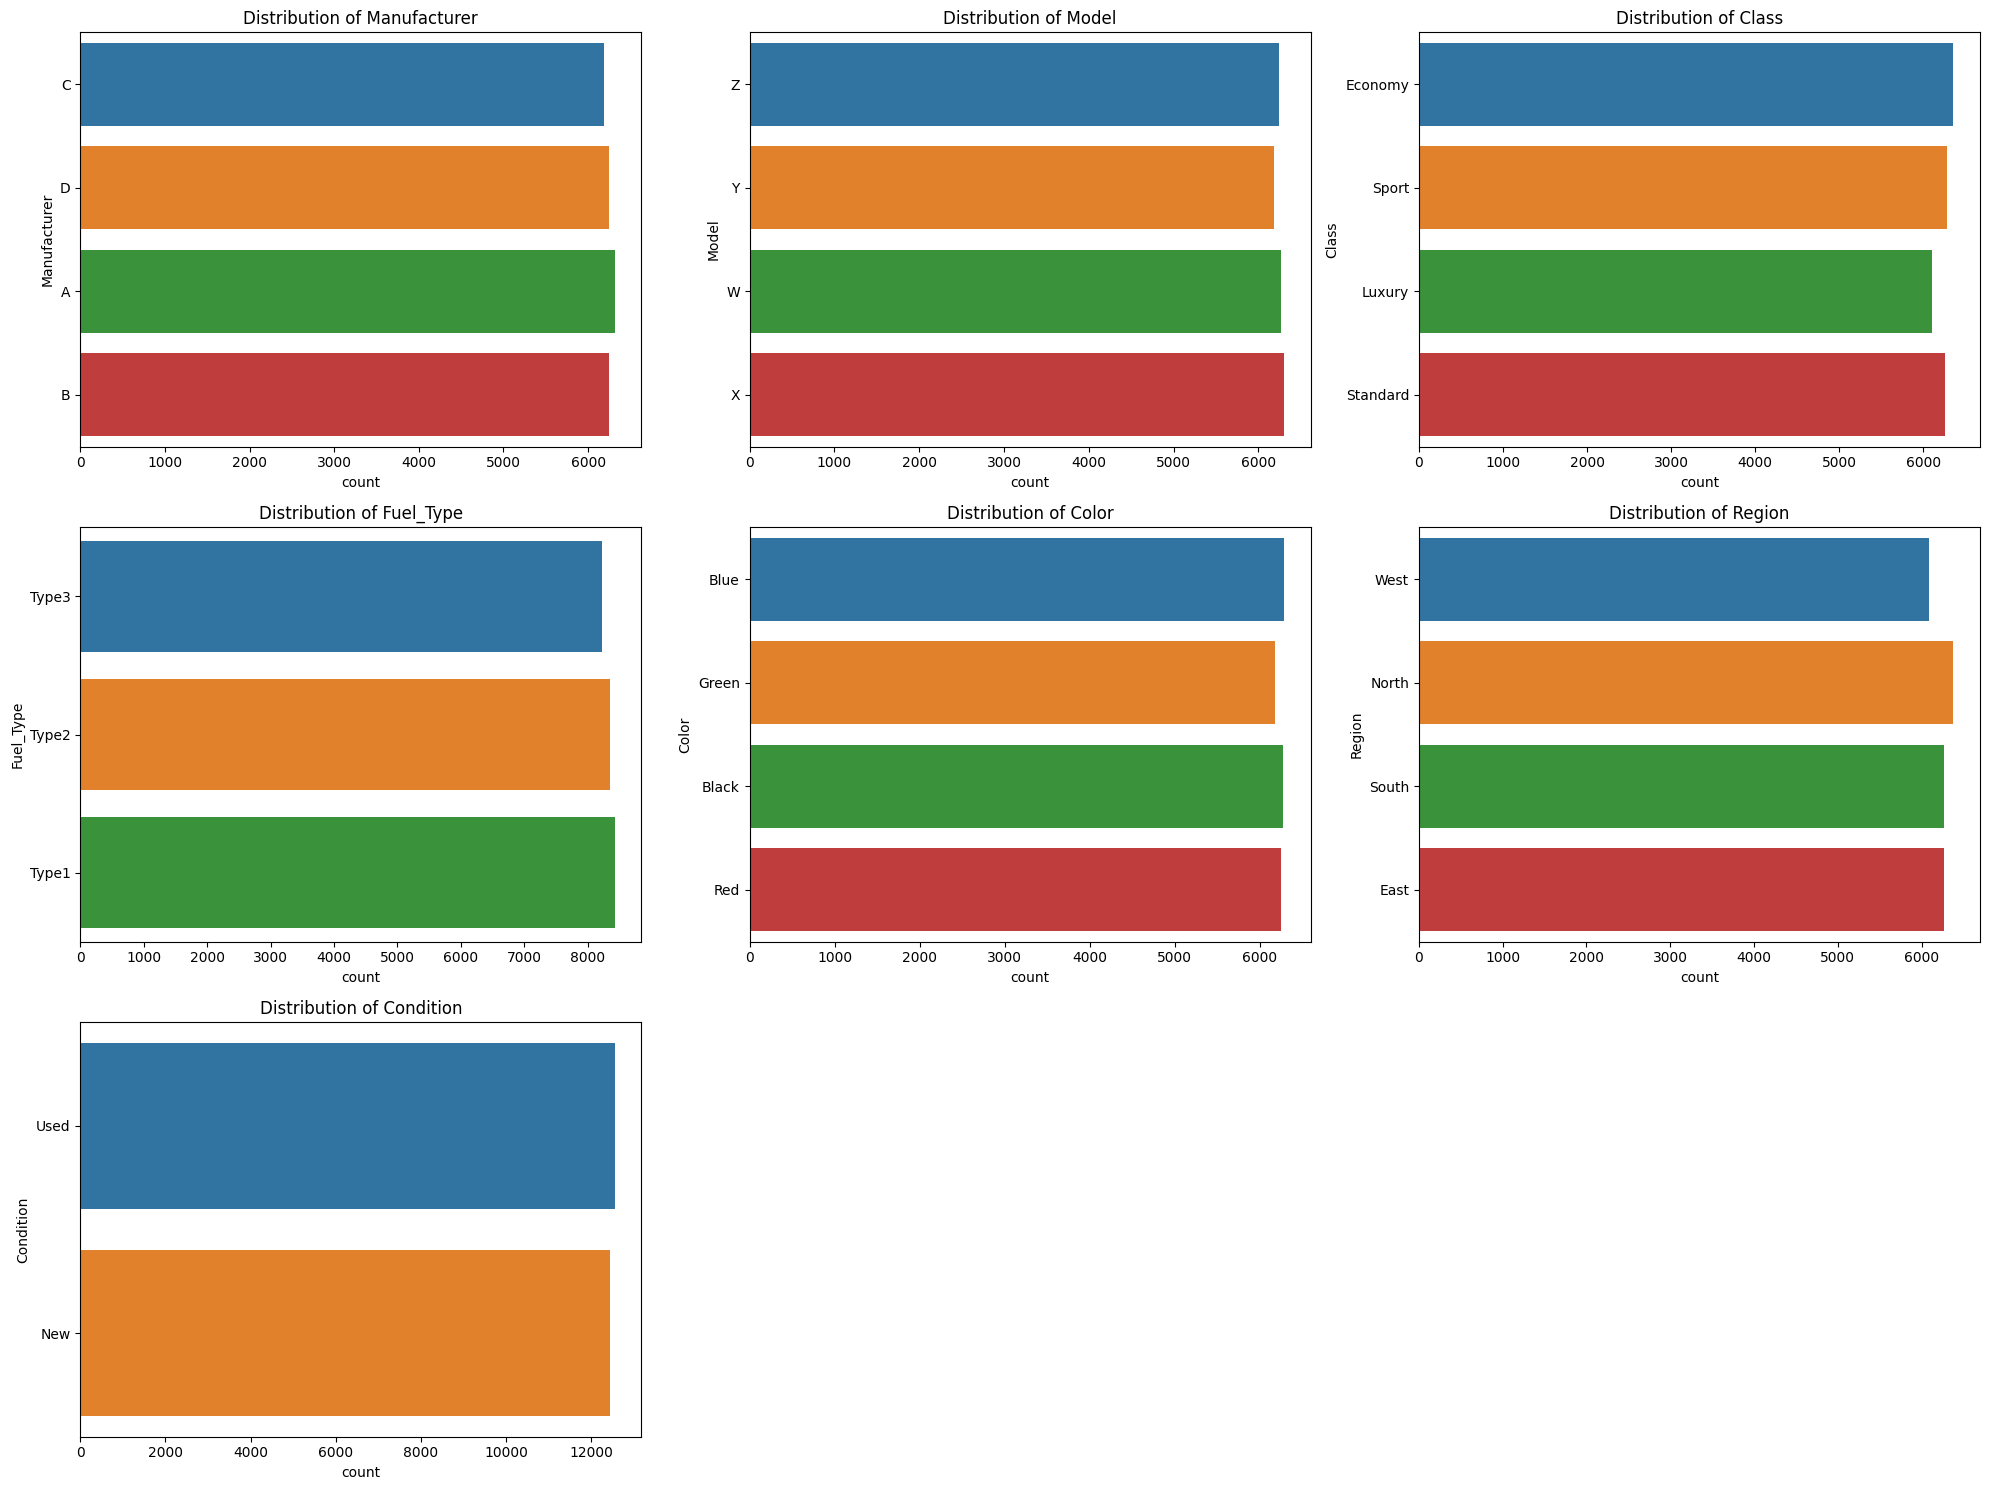

In [6]:
# Visualize the categorical features
categorical_columns = ['Manufacturer', 'Model', 'Class', 'Fuel_Type', 'Color', 'Region', 'Condition']

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

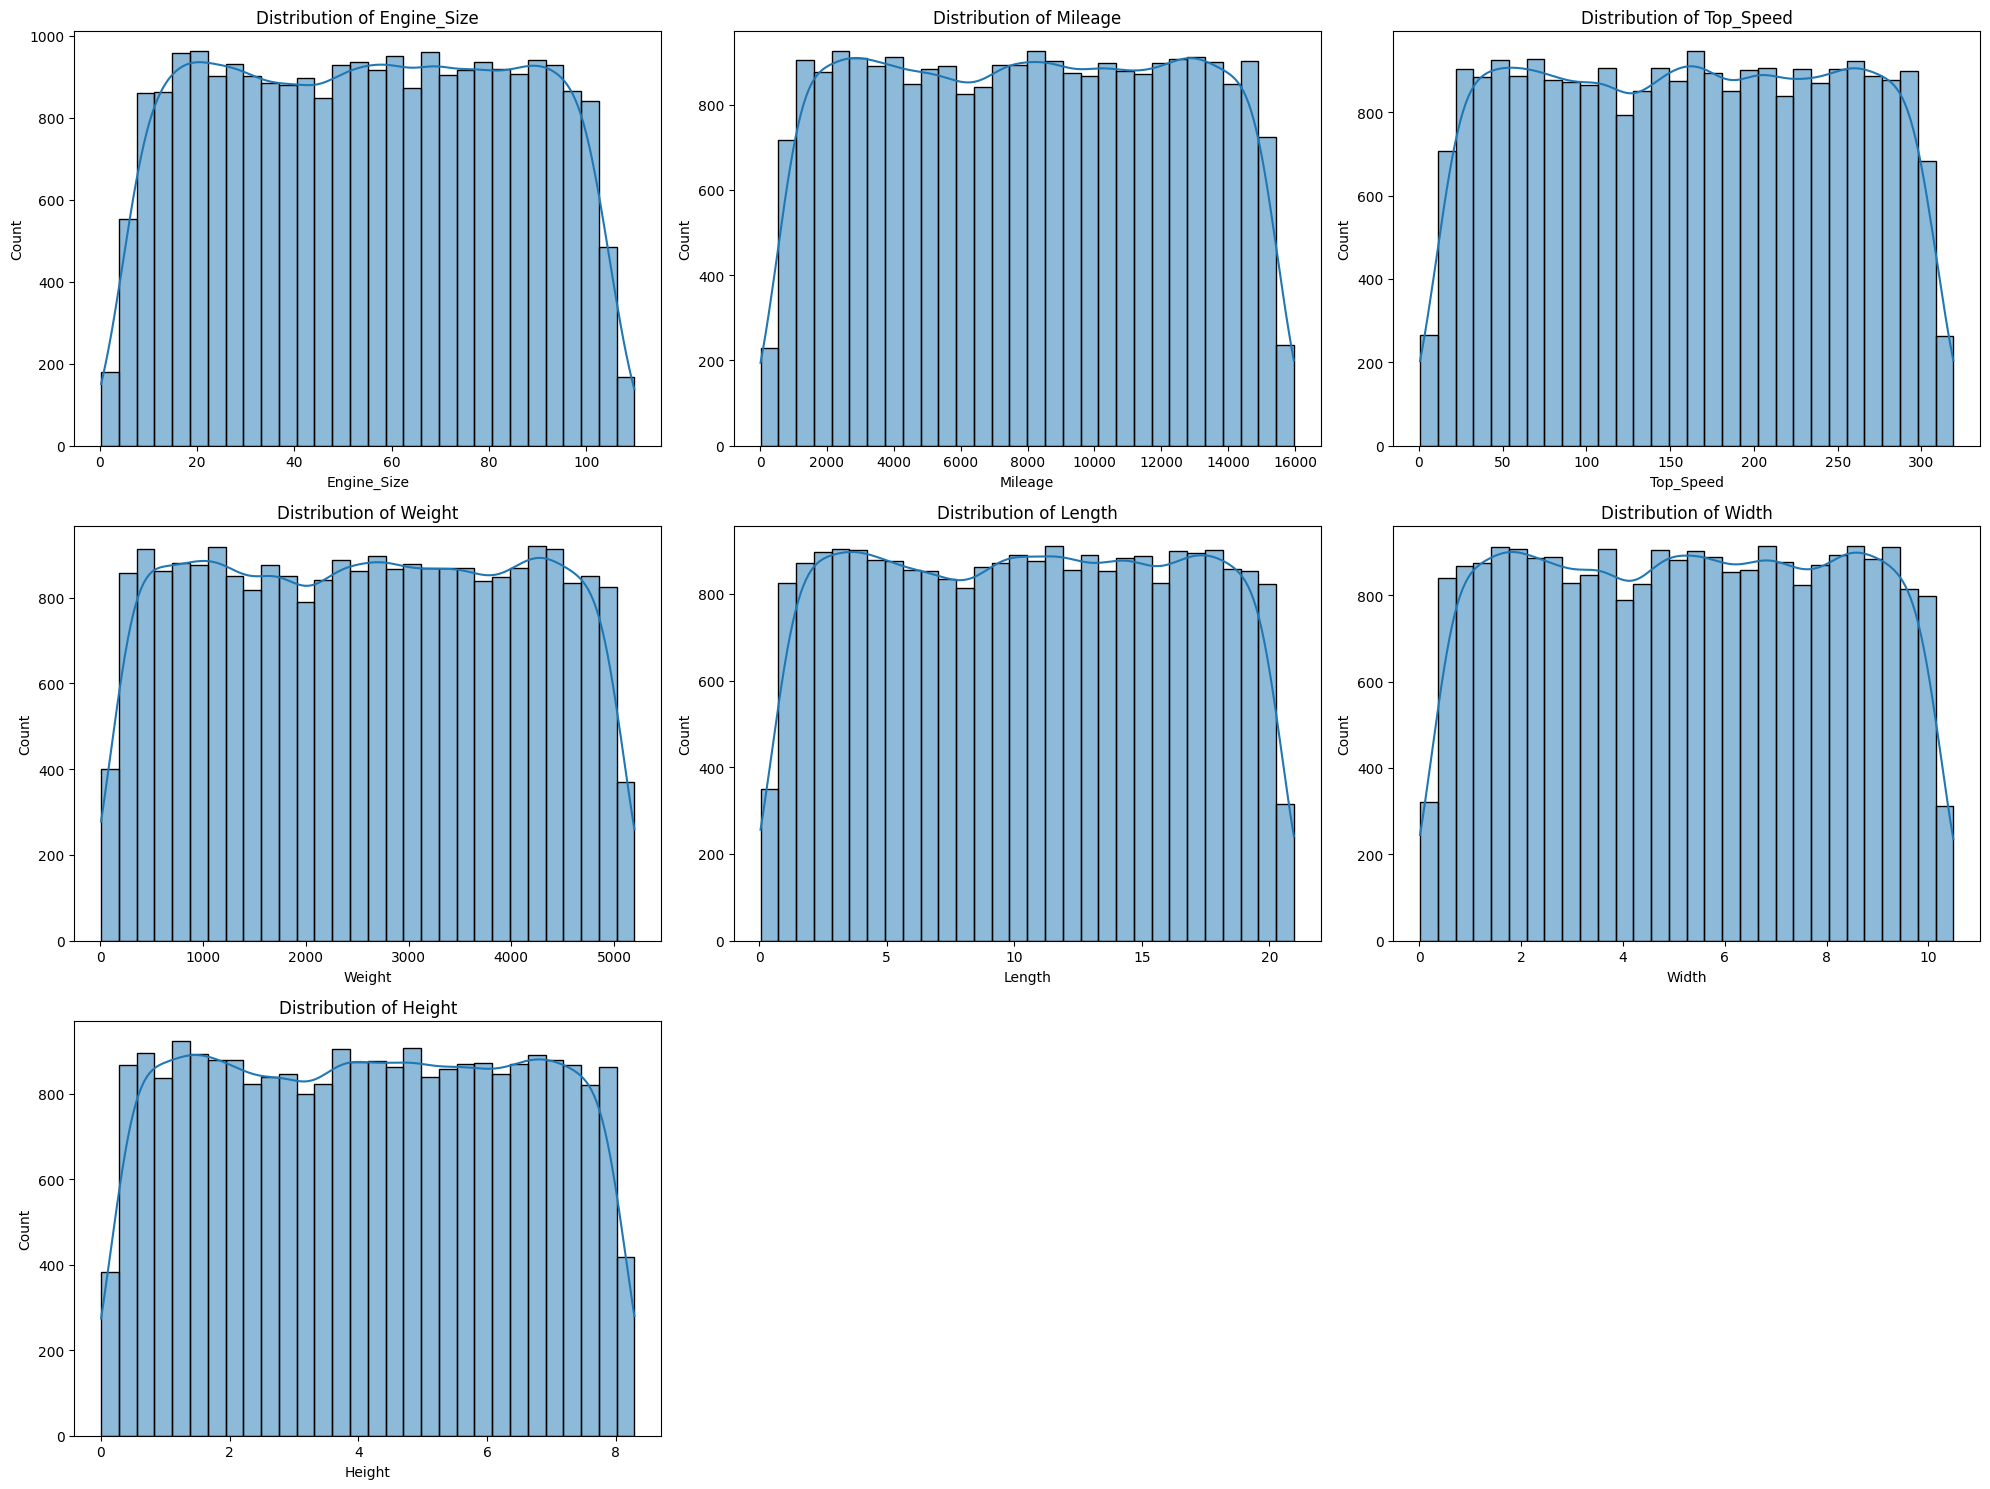

In [7]:
# Visualize the numeric features
numeric_columns = ['Engine_Size', 'Mileage', 'Top_Speed', 'Weight', 'Length', 'Width', 'Height']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

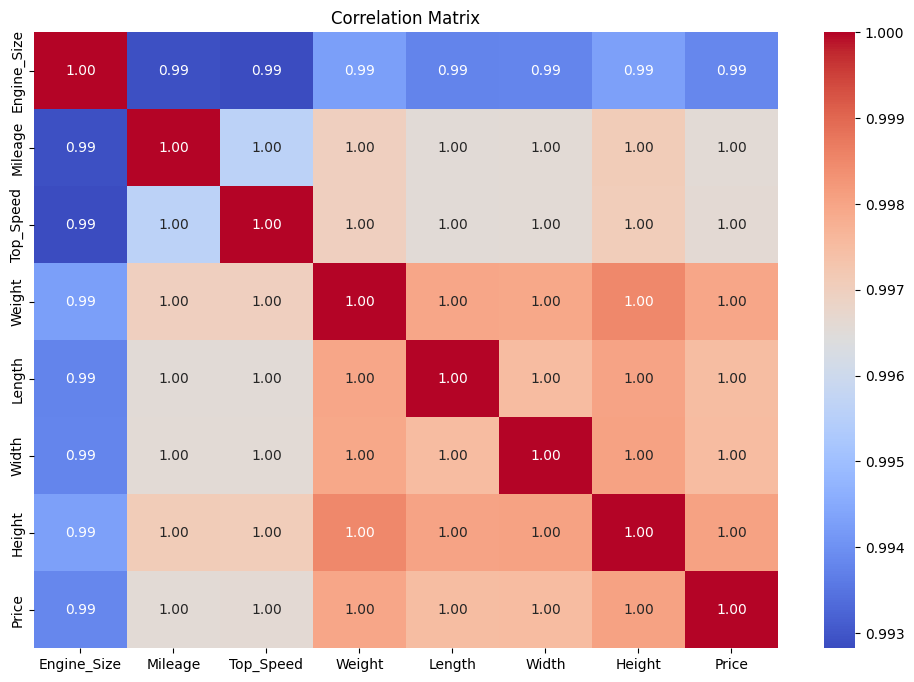

In [8]:
# Correlation matrix (only numeric columns)
plt.figure(figsize=(12, 8))
numeric_df = df[numeric_columns + ['Price']]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

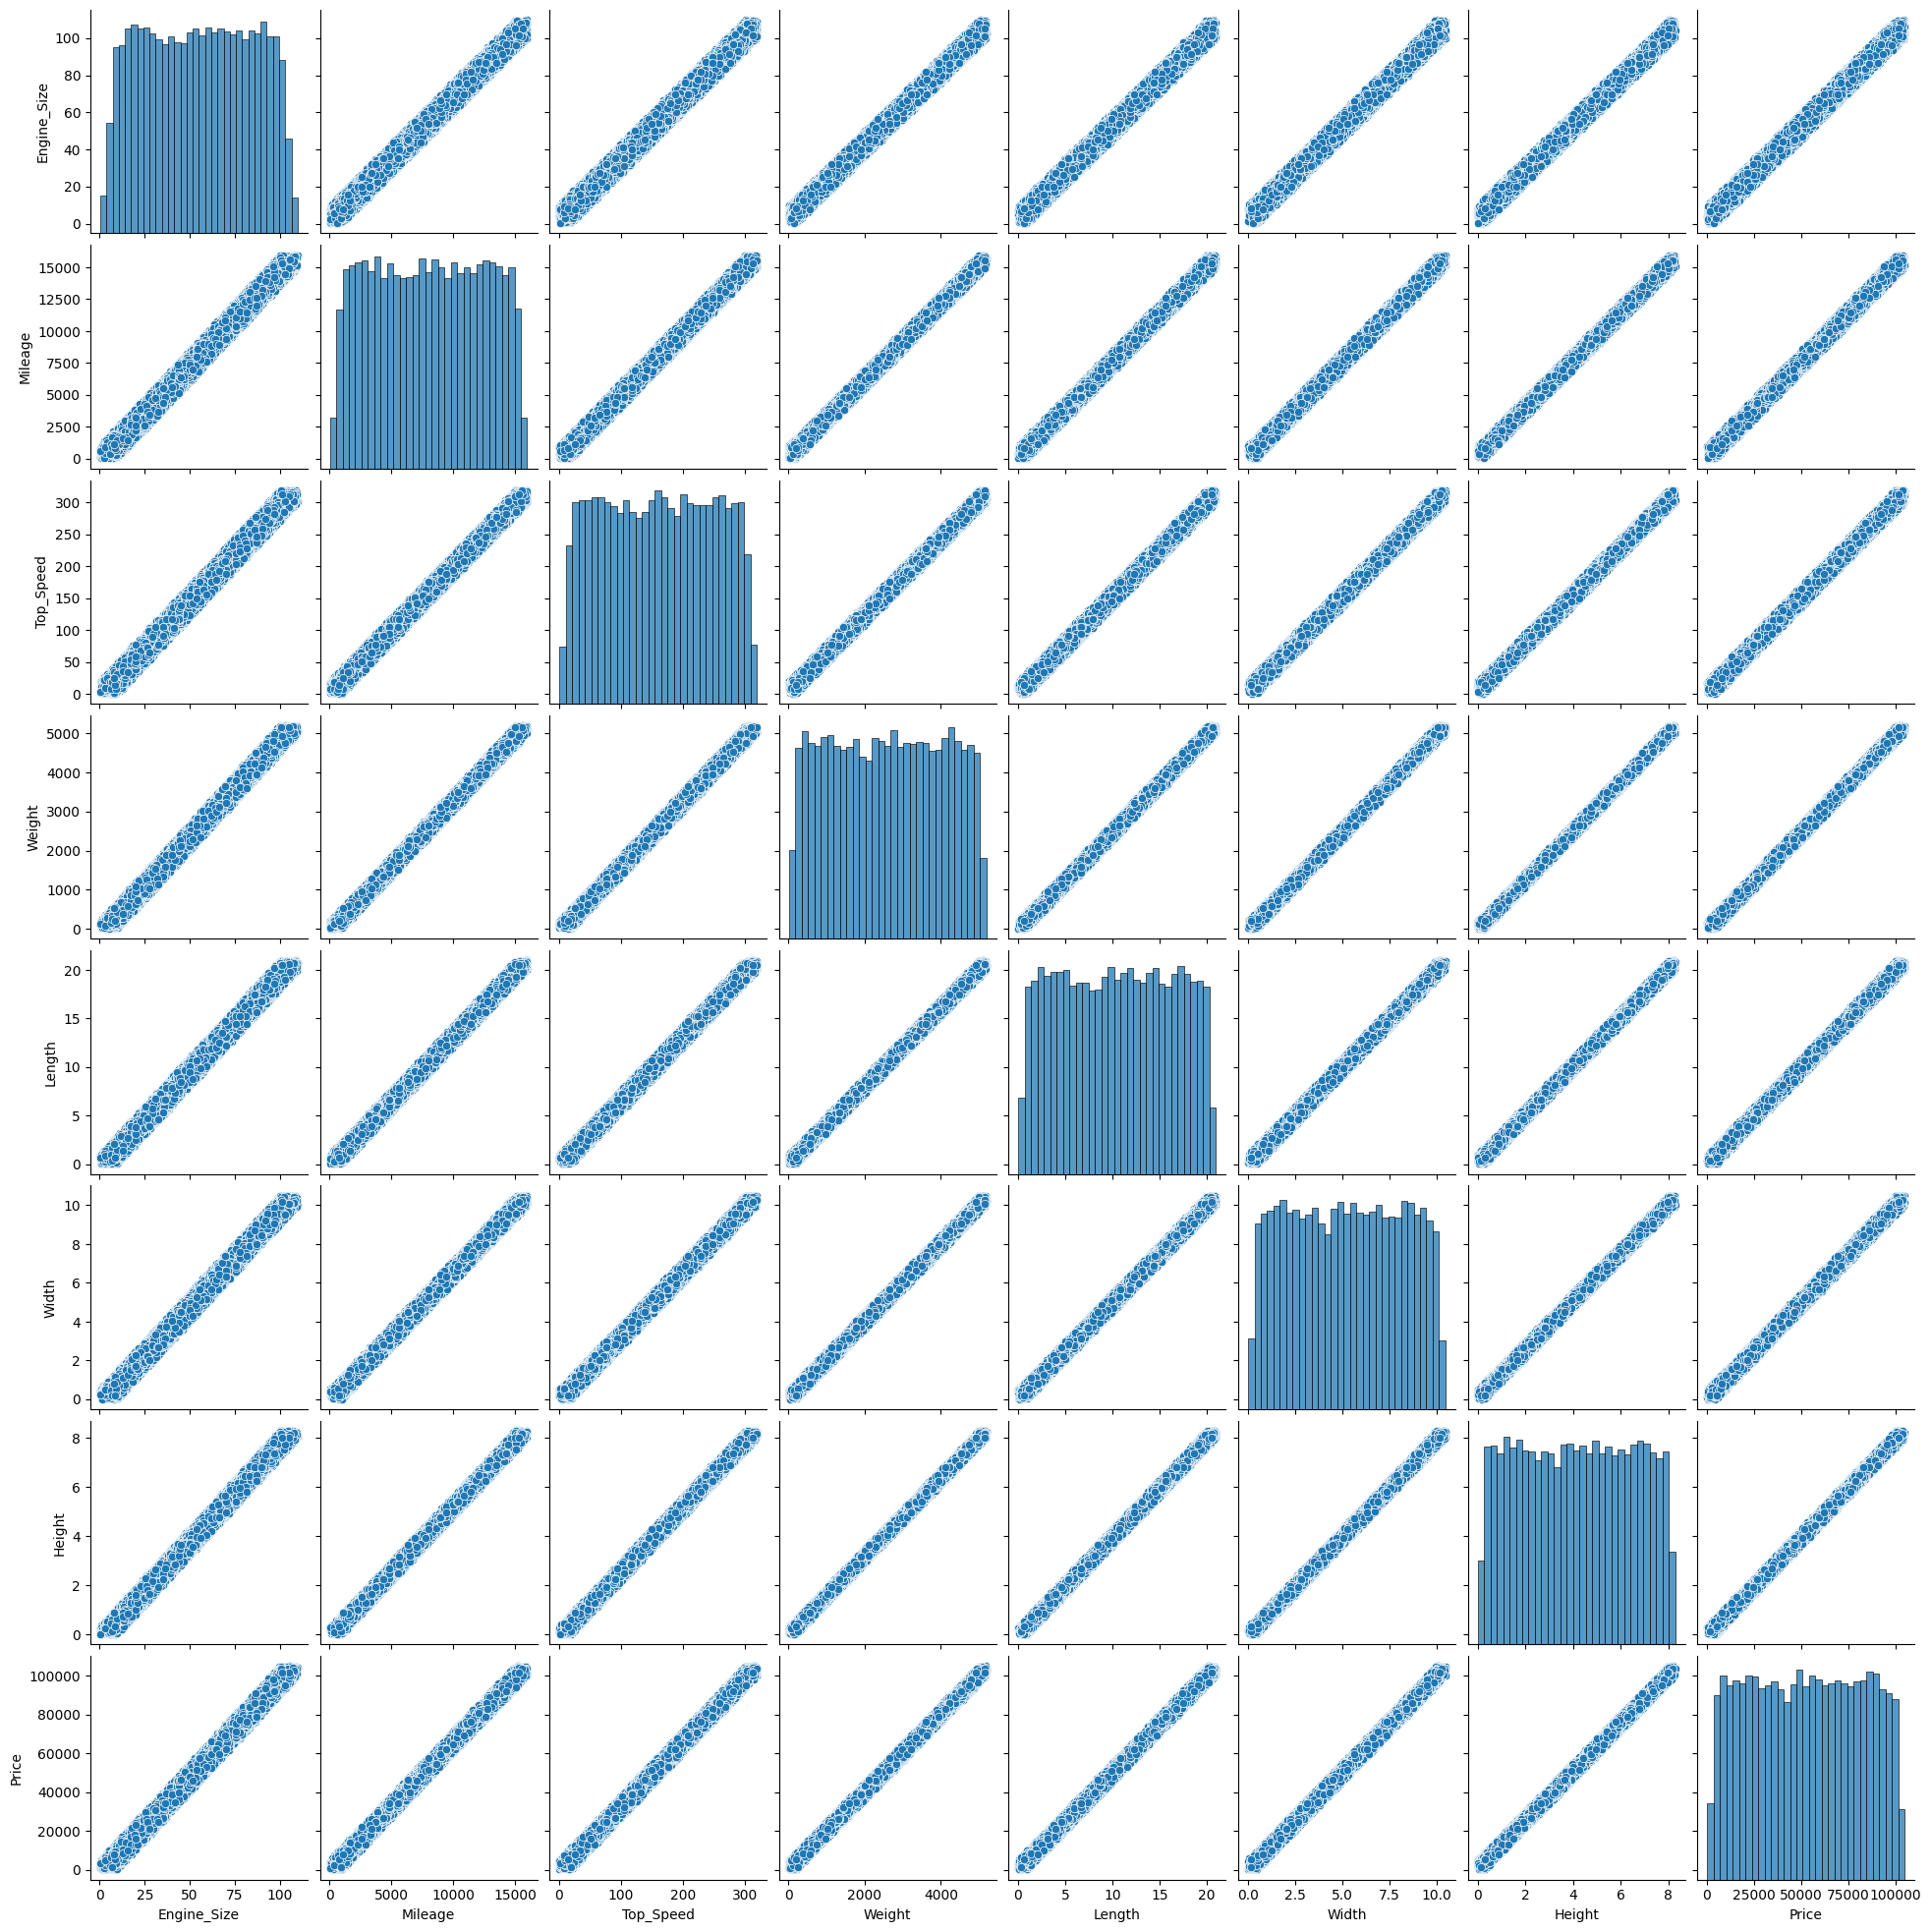

In [9]:
# Pairplot for numerical columns to visualize relationships
sns.pairplot(df[numeric_columns + ['Price']])
plt.show()

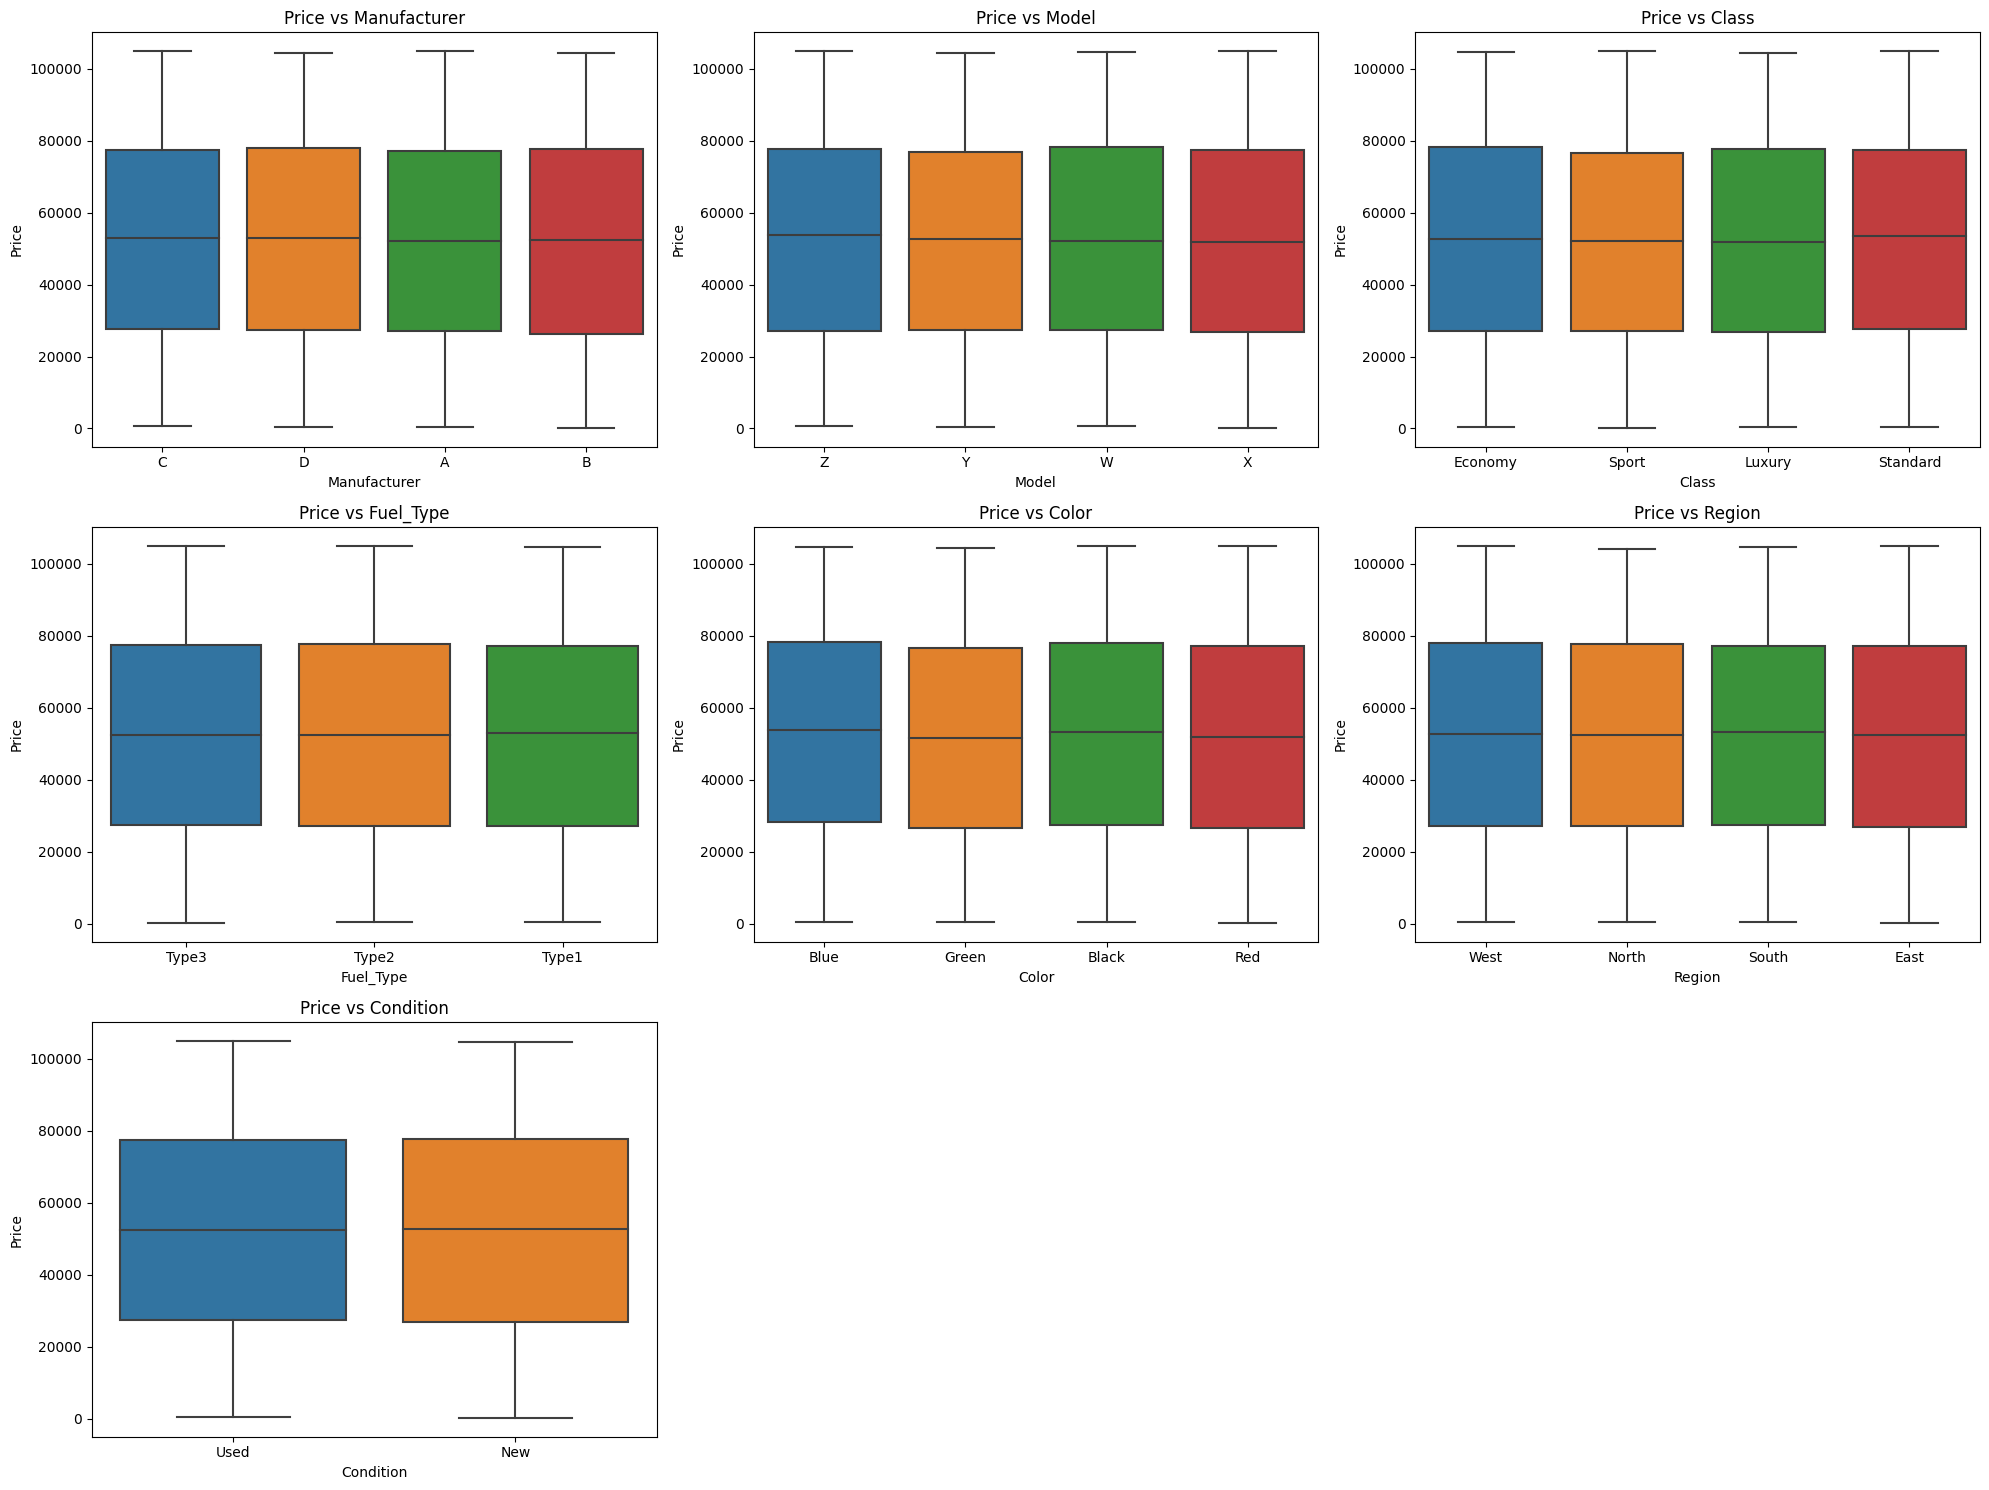

In [10]:
# Box plots to visualize the relationship between categorical variables and the target variable 'Price'
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='Price', data=df)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

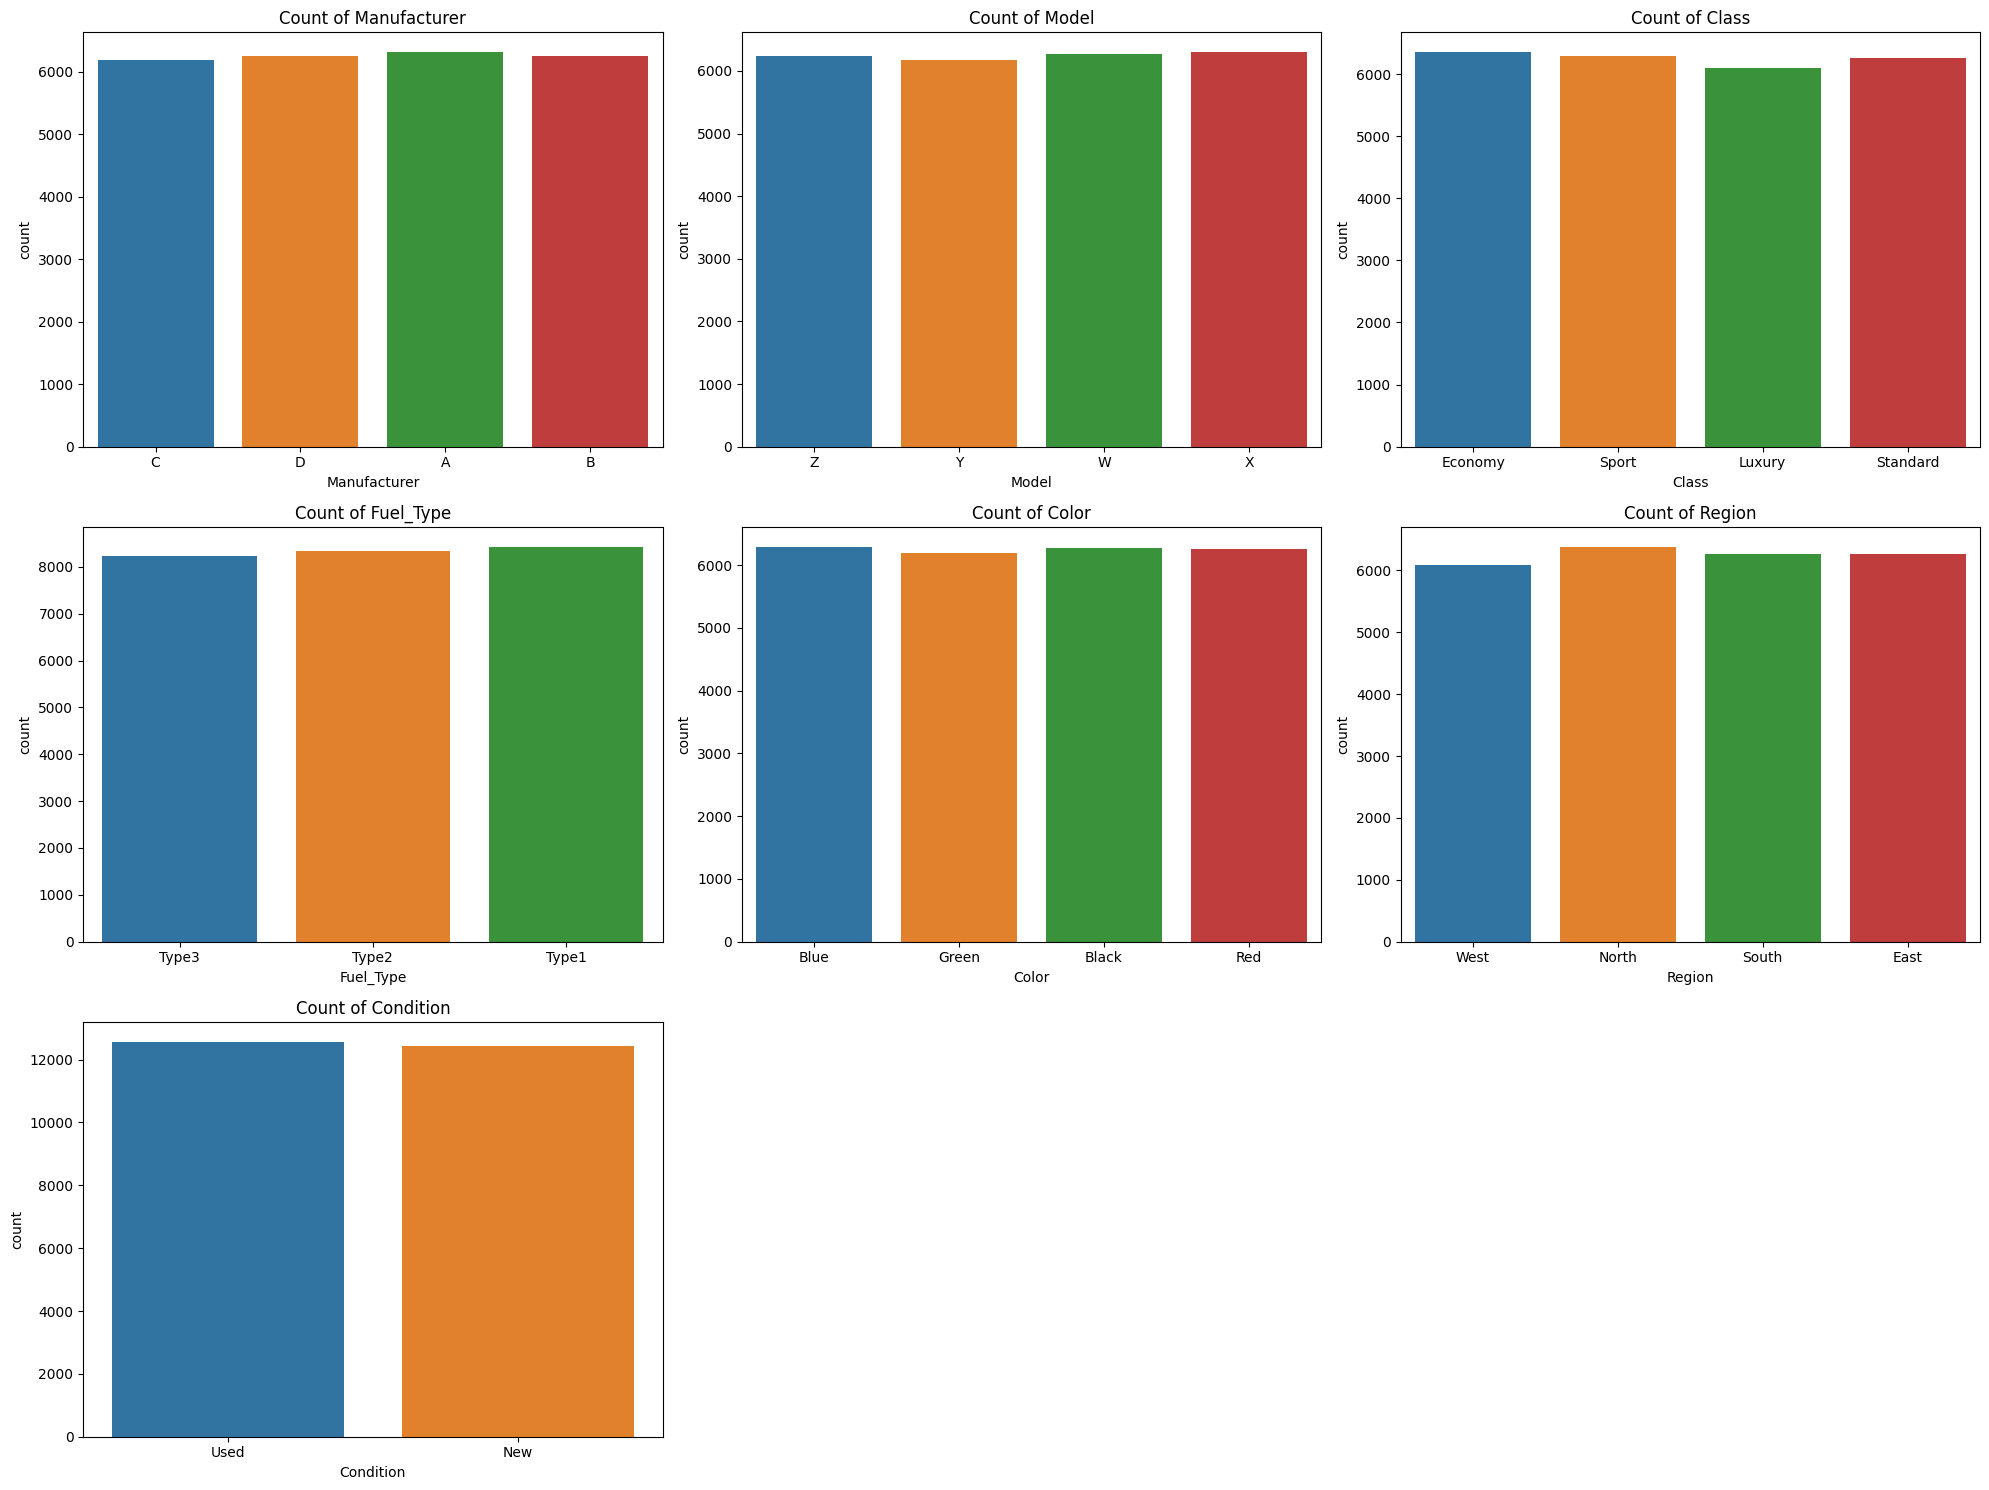

In [11]:
# Count plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

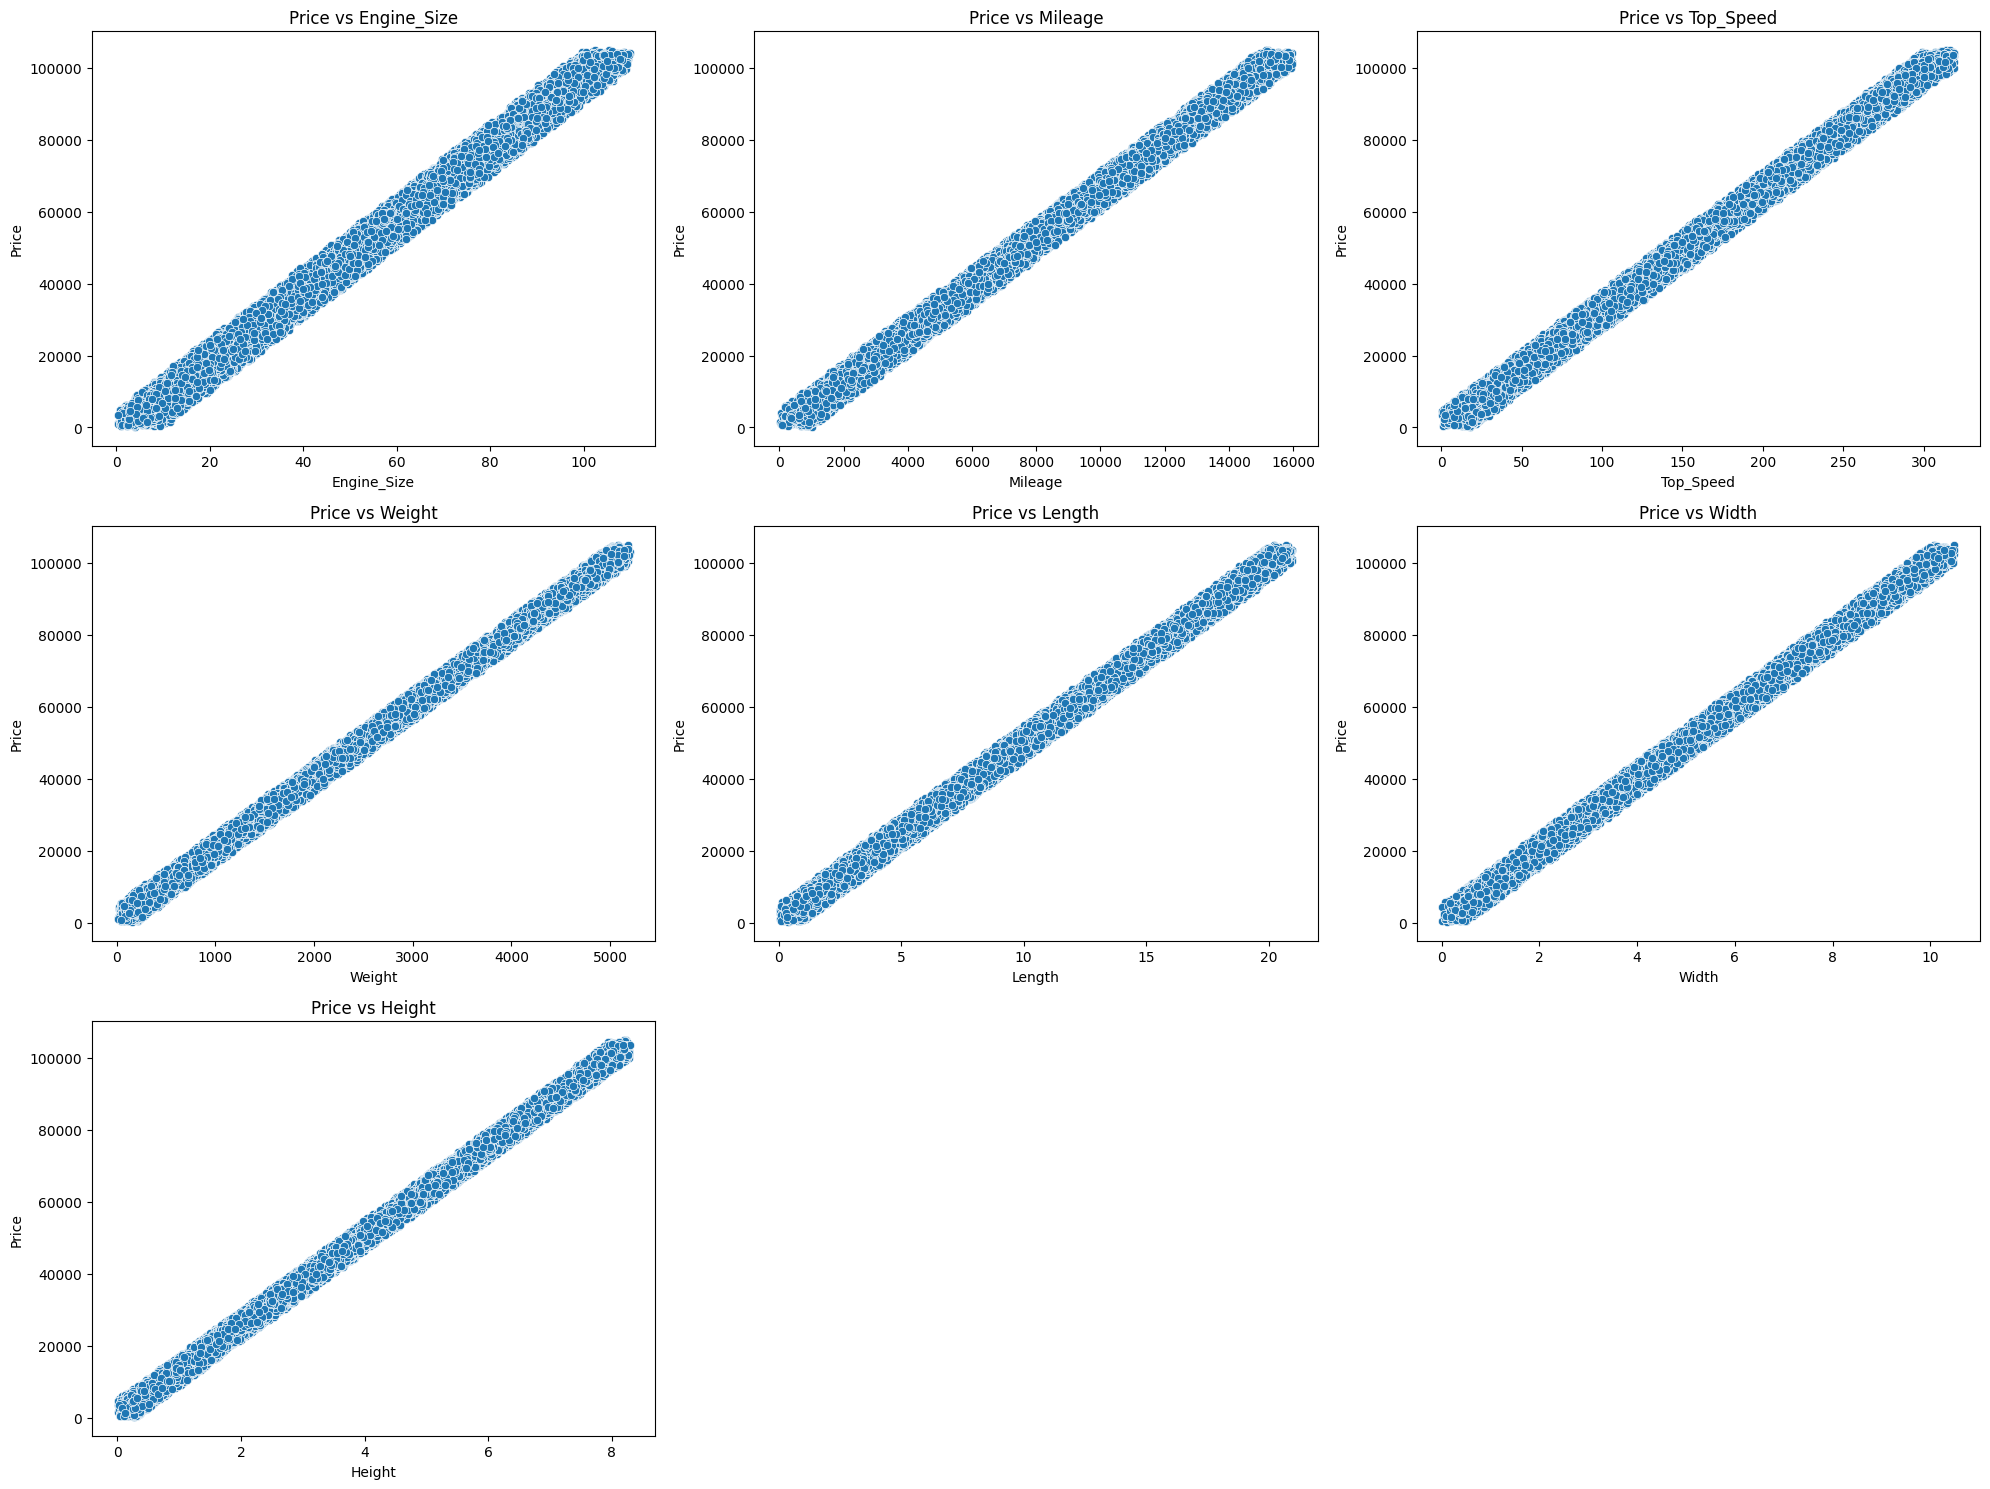

In [12]:
# Scatter plots for numeric variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='Price', data=df)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

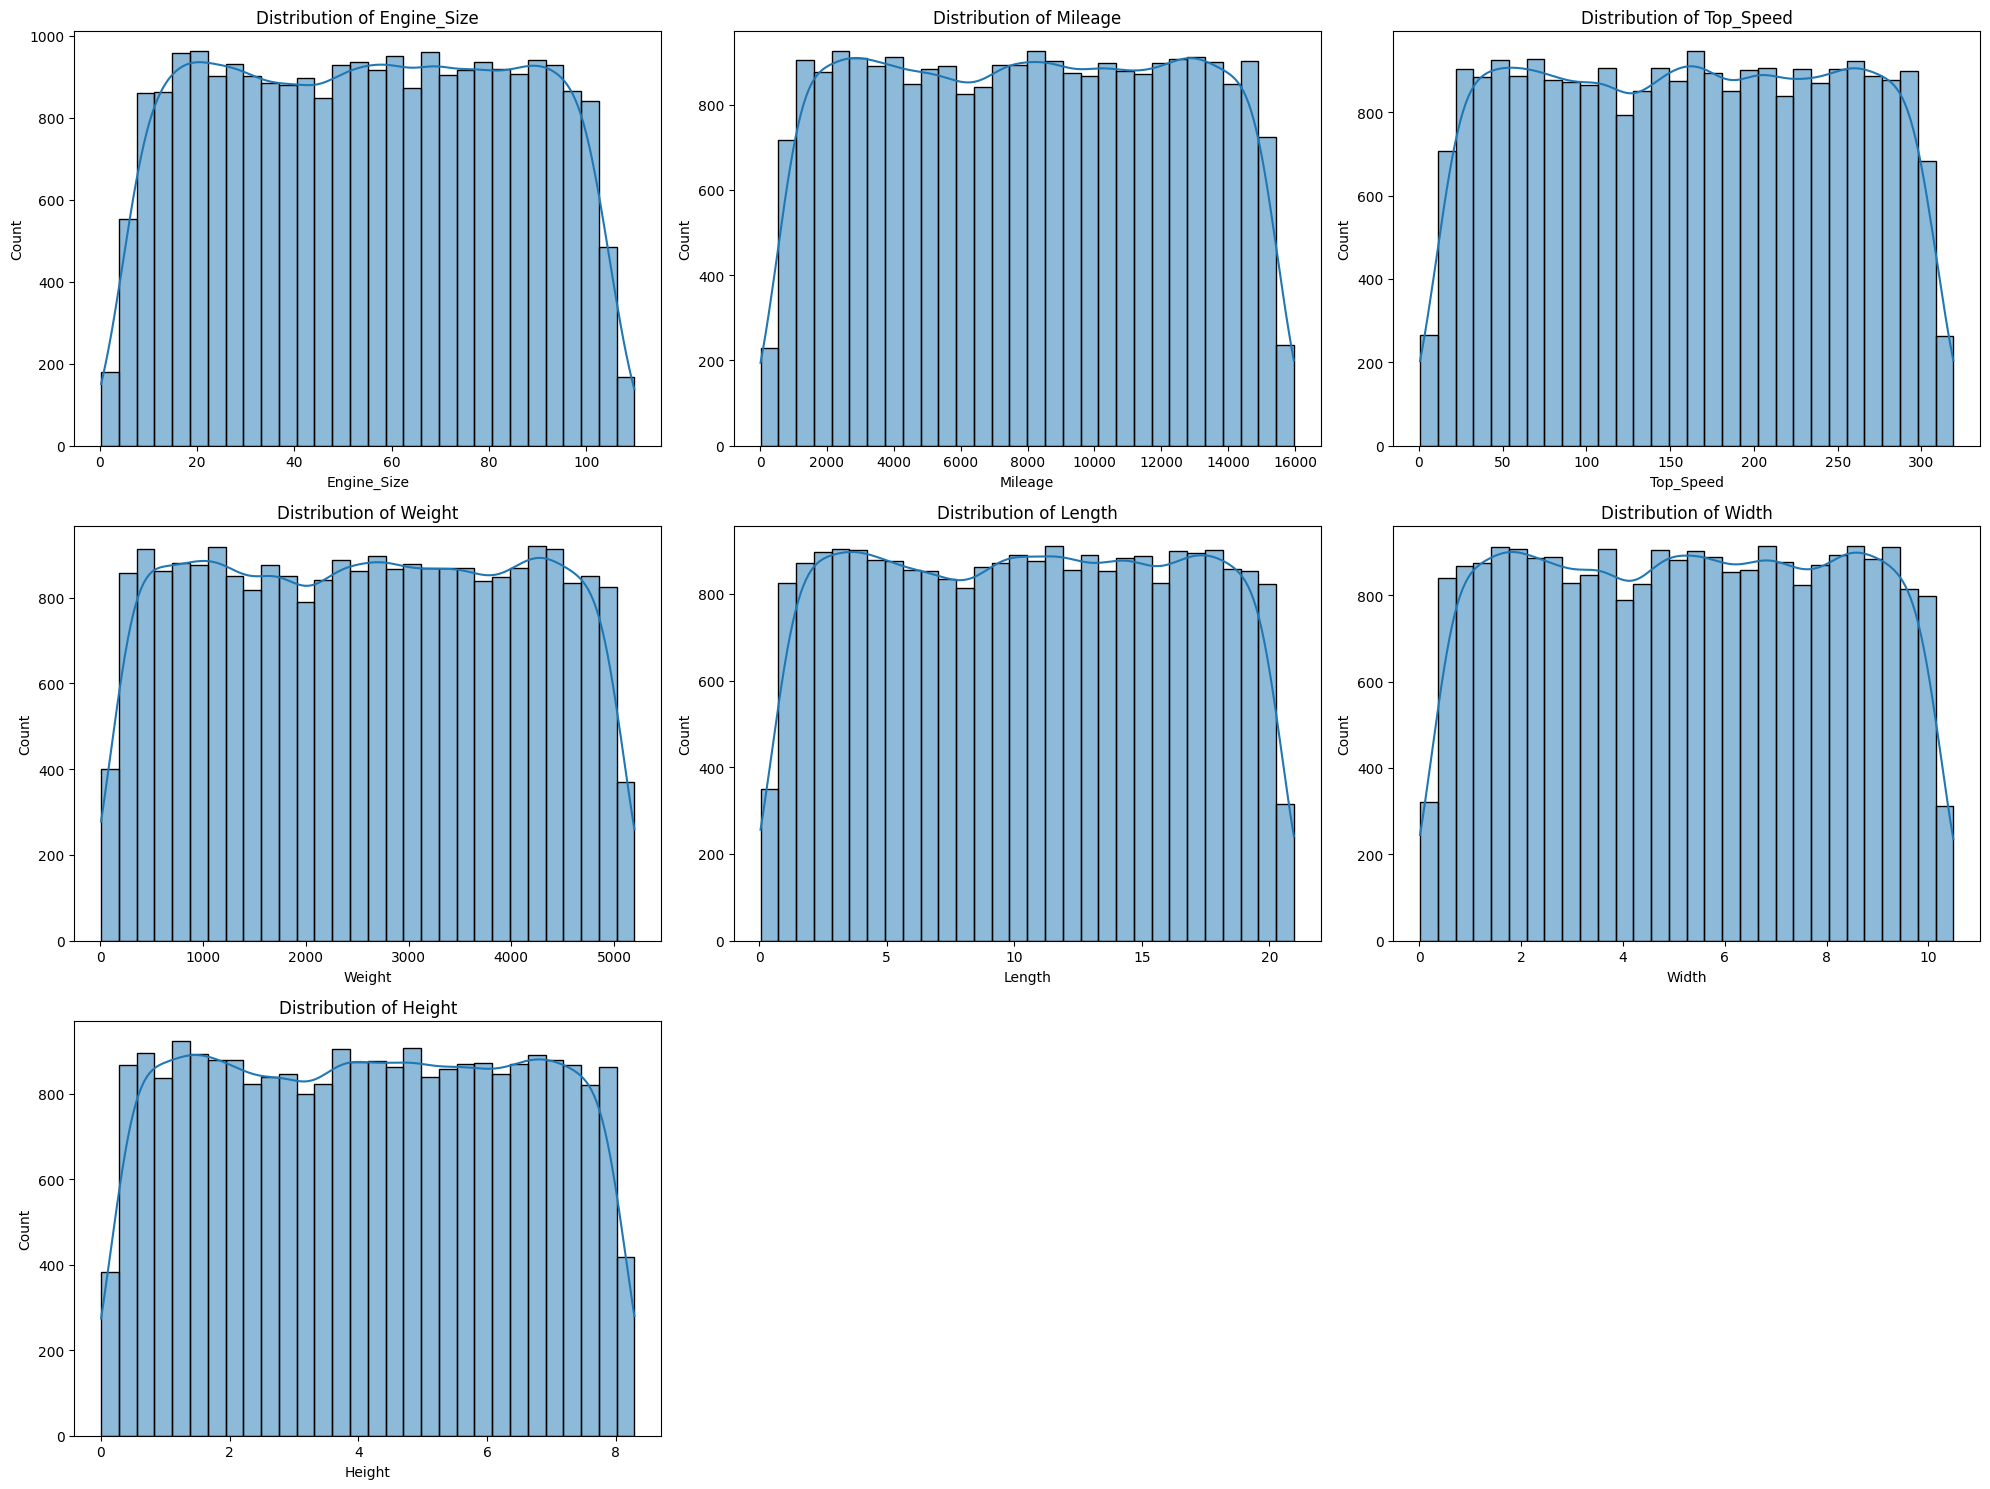

In [13]:
# Distribution plots for numeric variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

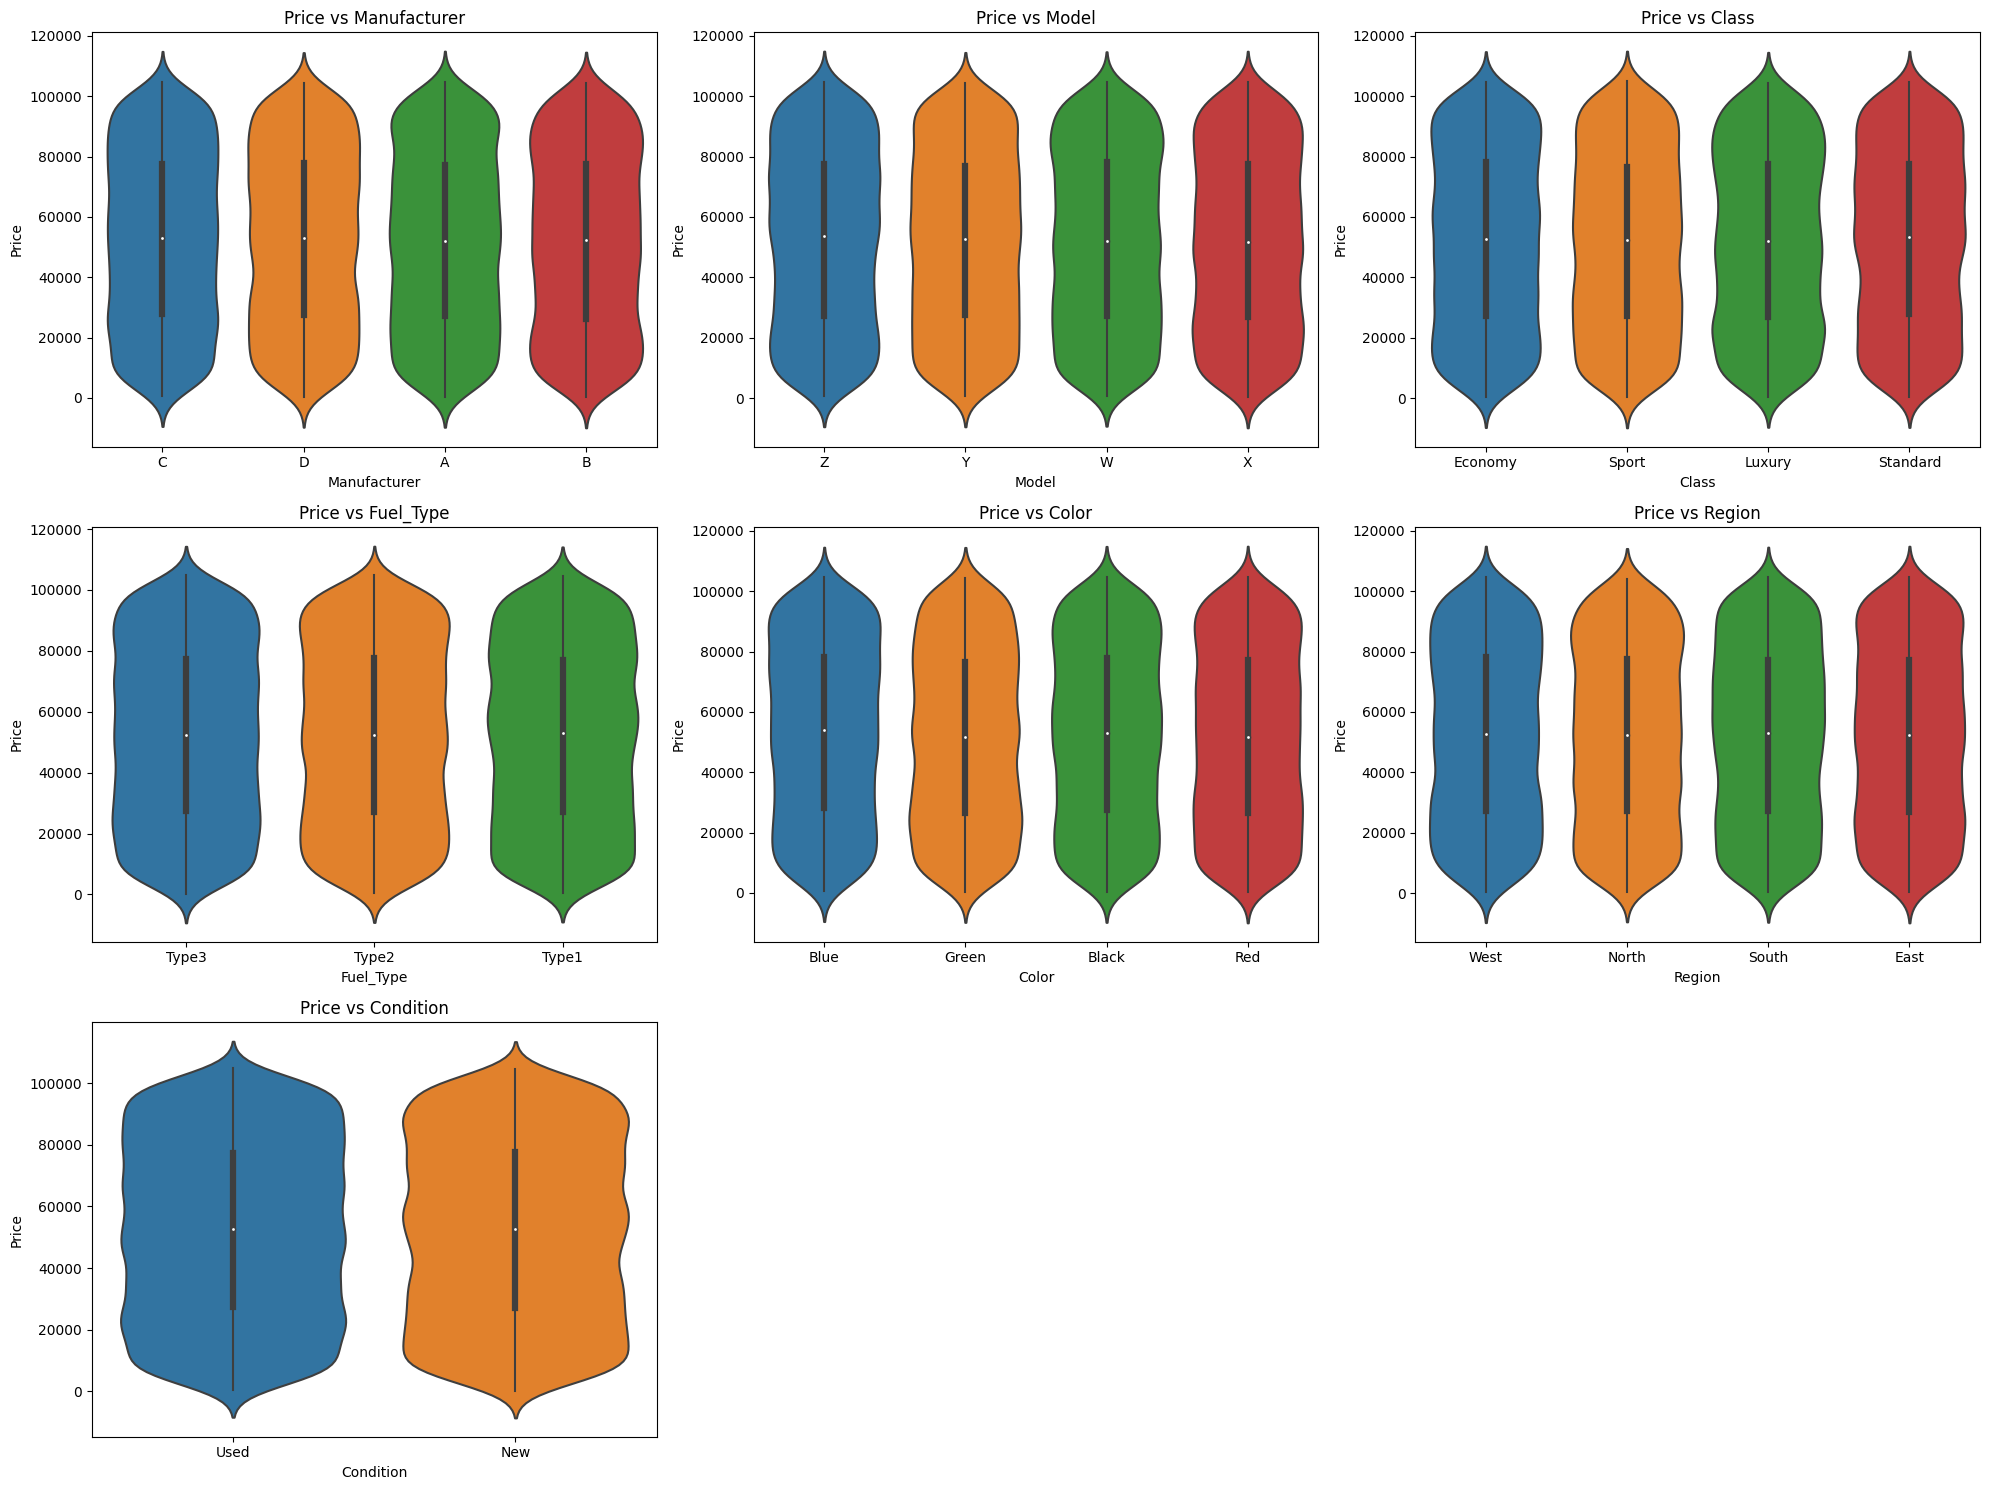

In [14]:
# Violin plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.violinplot(x=col, y='Price', data=df)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

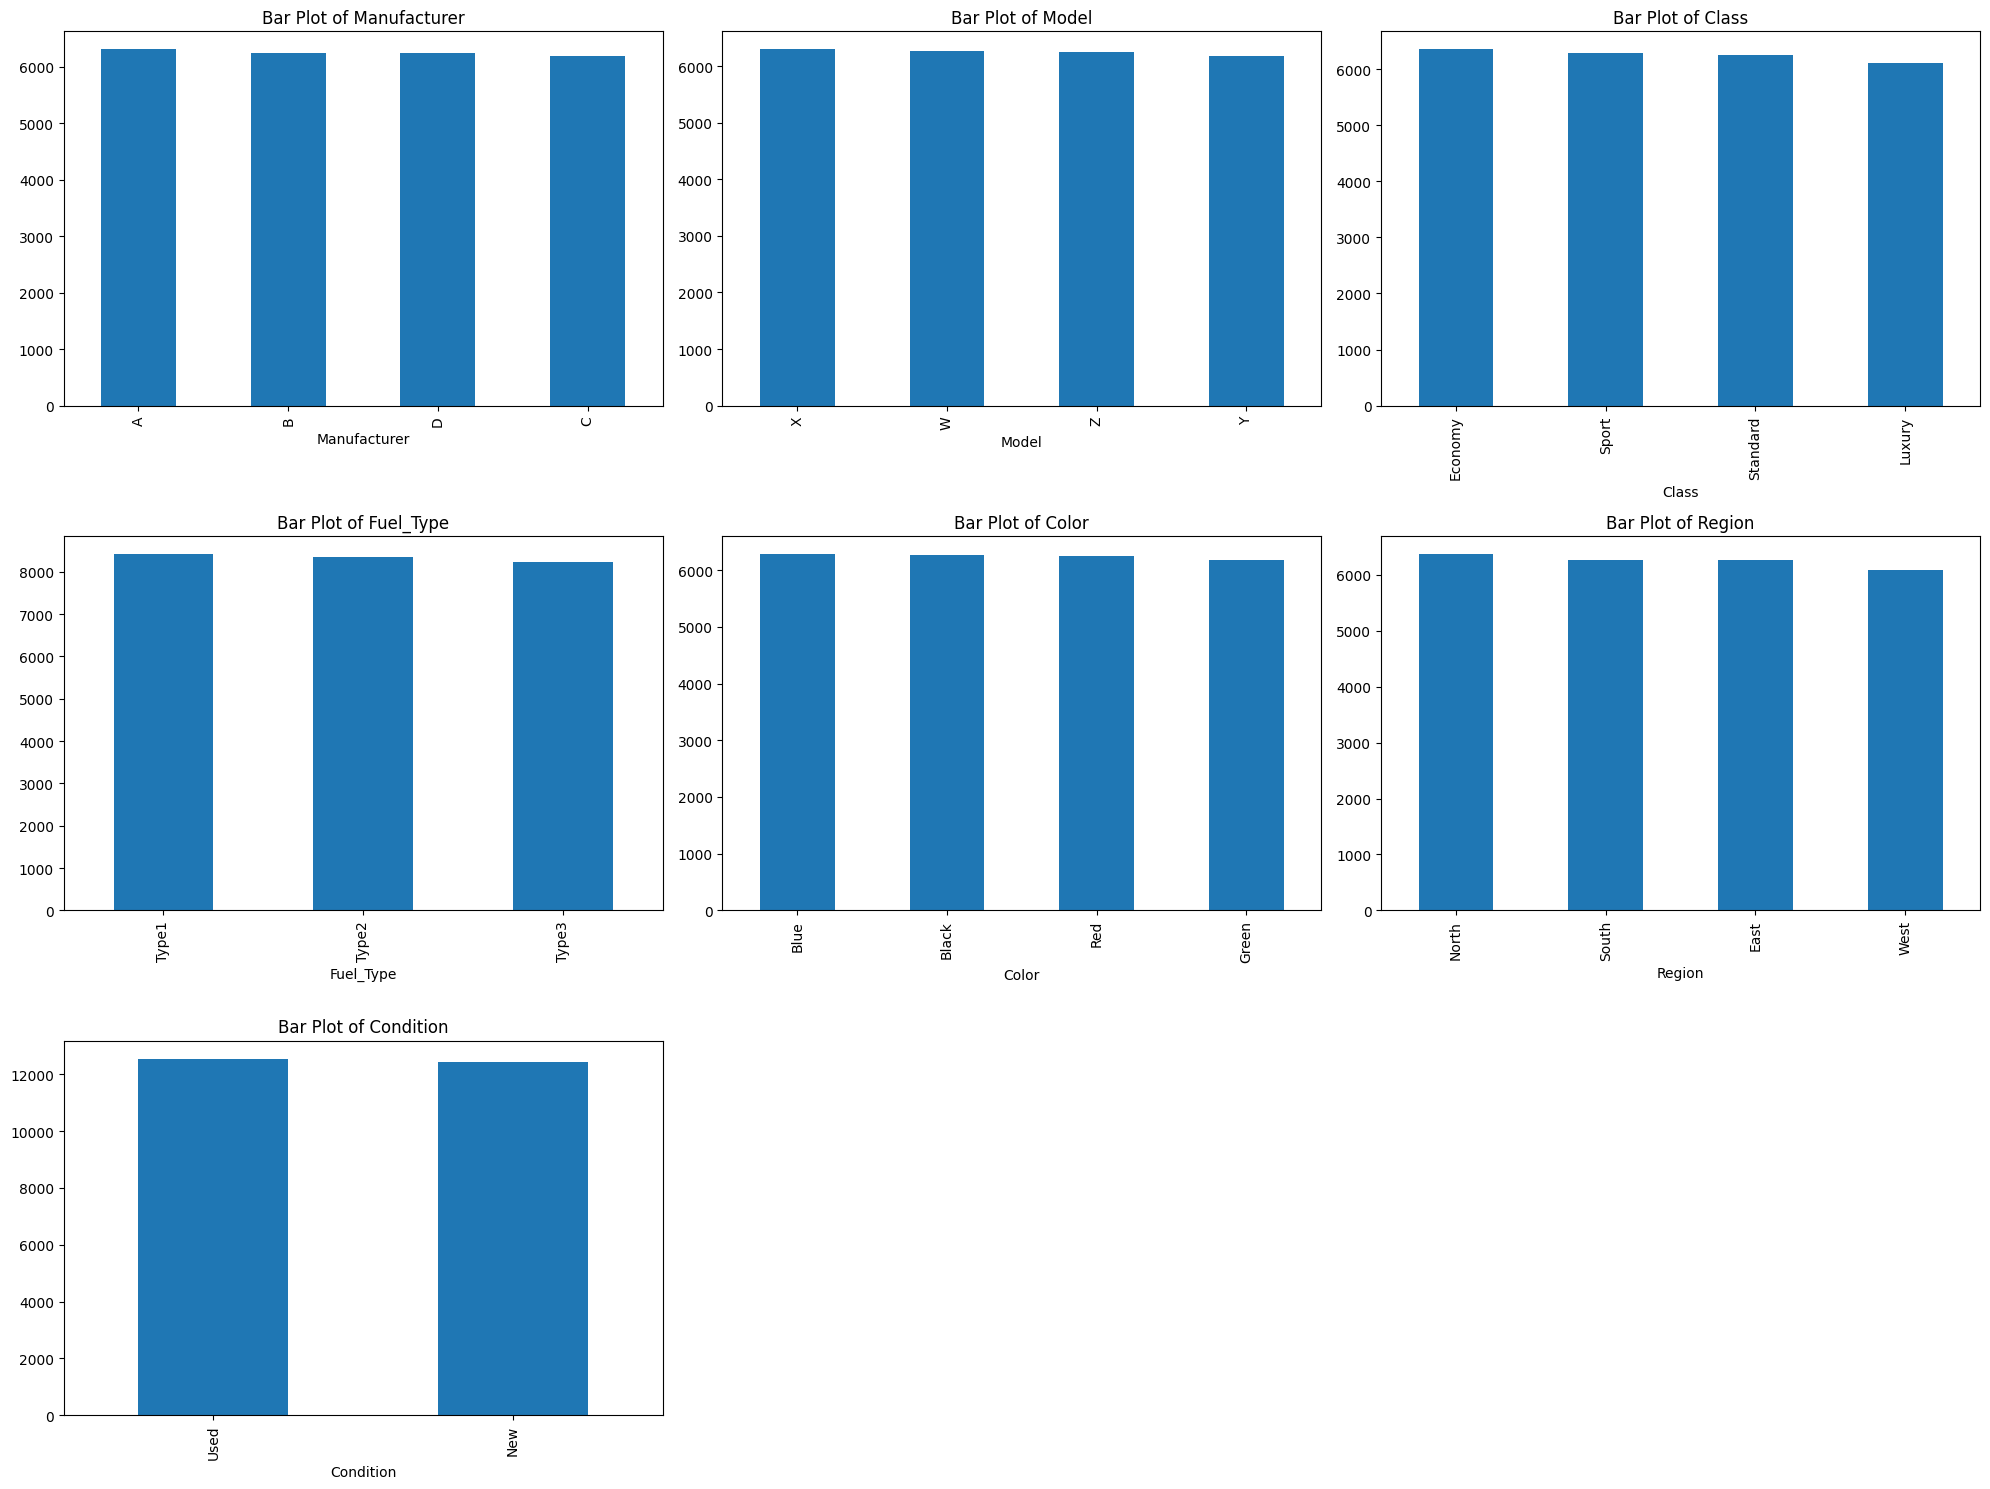

In [15]:
# Bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
plt.tight_layout()
plt.show()

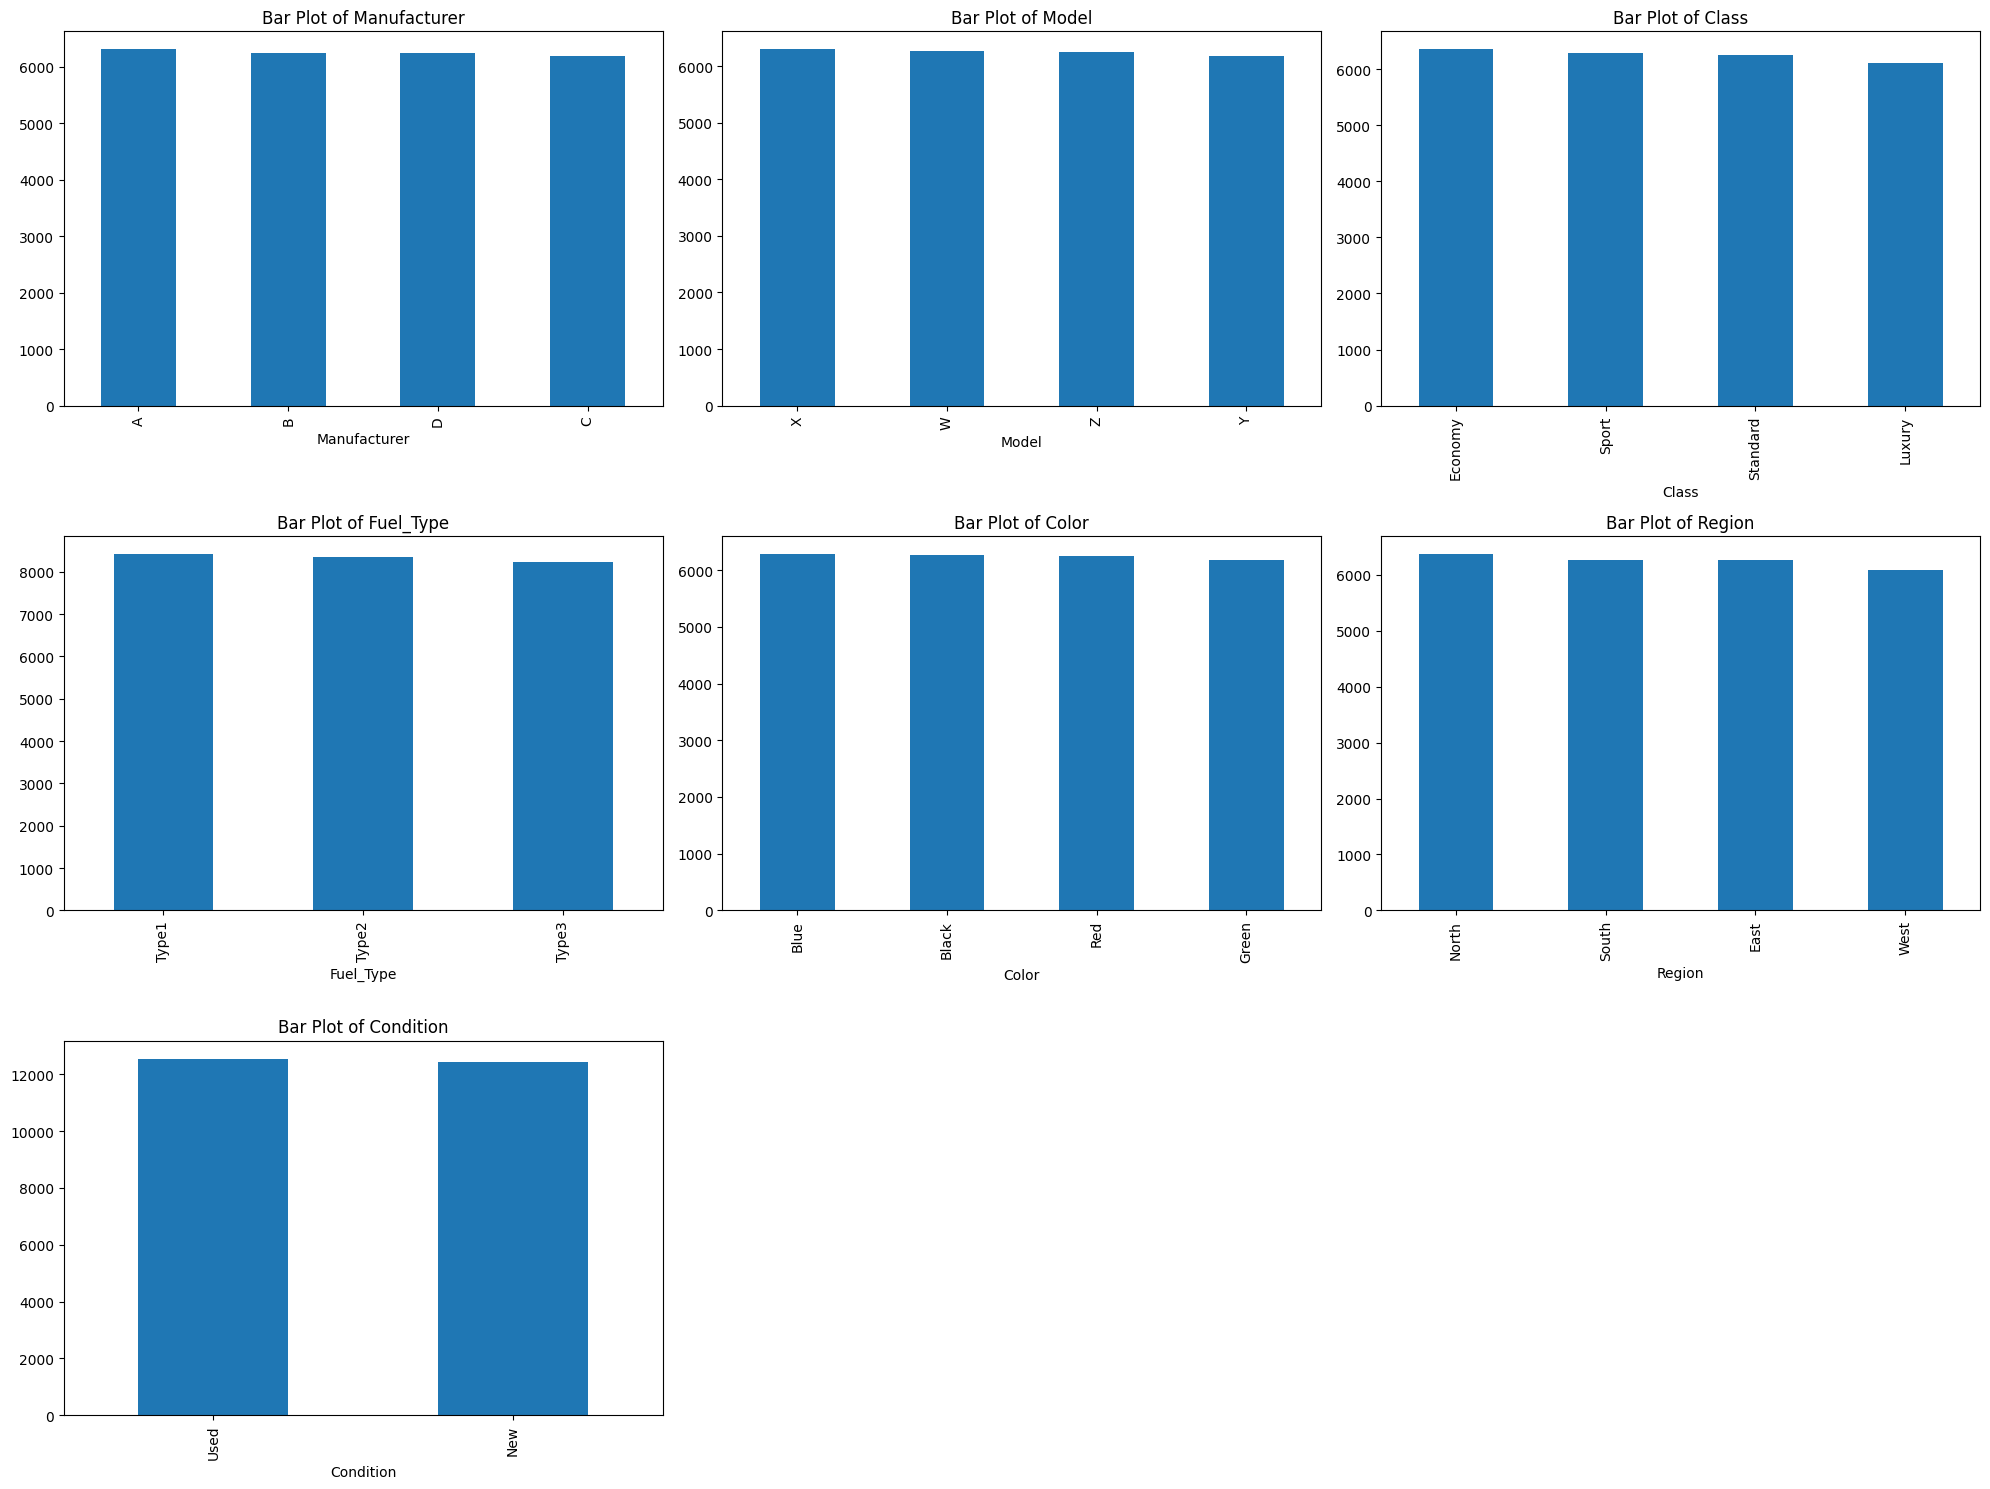

In [16]:
# Bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
plt.tight_layout()
plt.show()

/tmp/ipykernel_18/2204702121.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2204702121.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2204

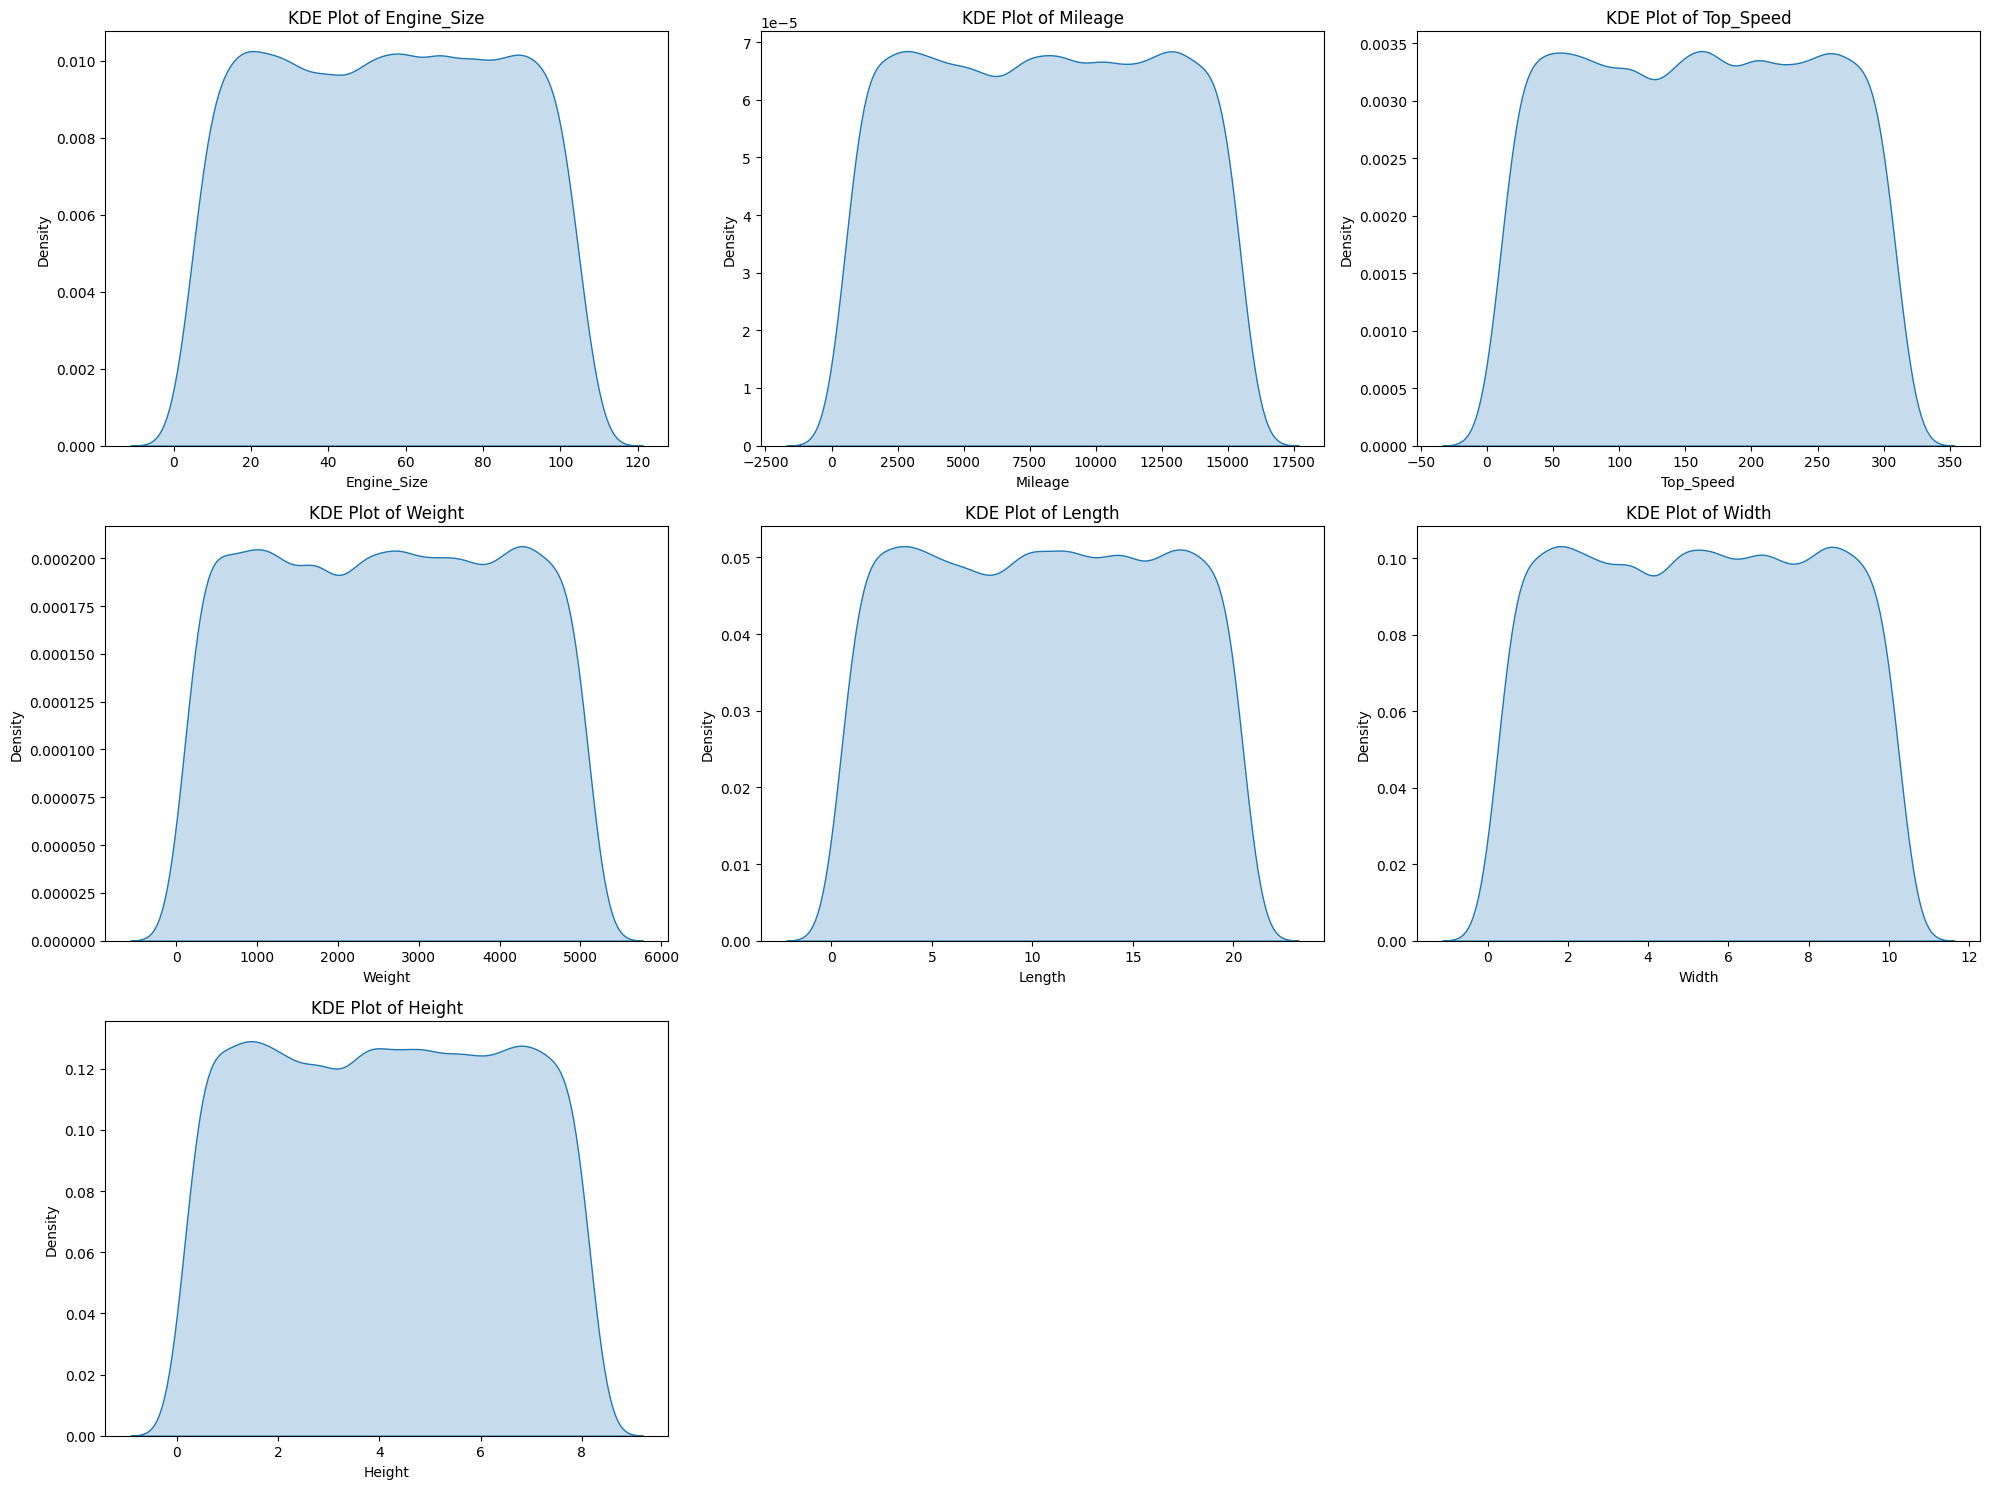

In [17]:
# KDE plots for numeric variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(df[col], shade=True)
    plt.title(f'KDE Plot of {col}')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


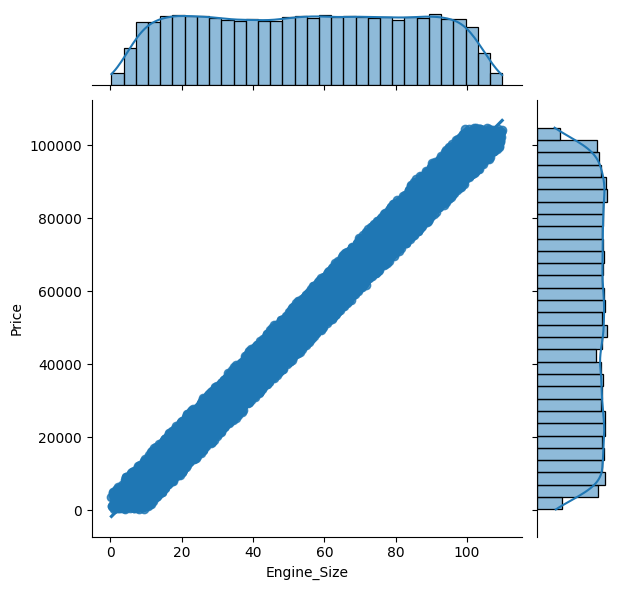

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


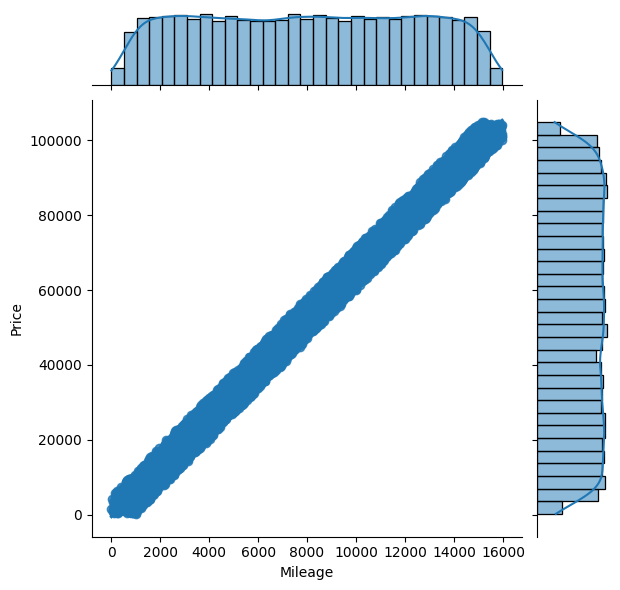

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


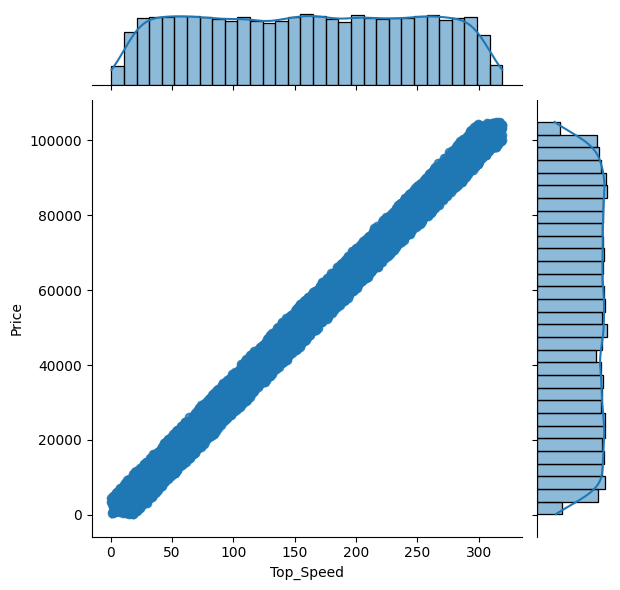

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


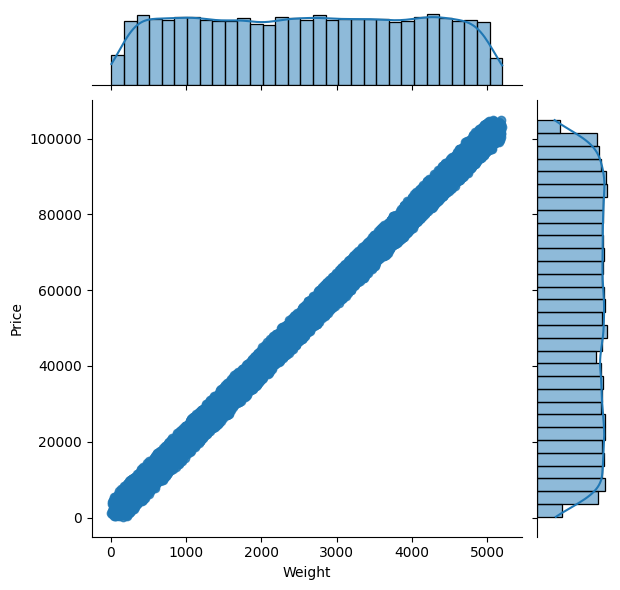

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


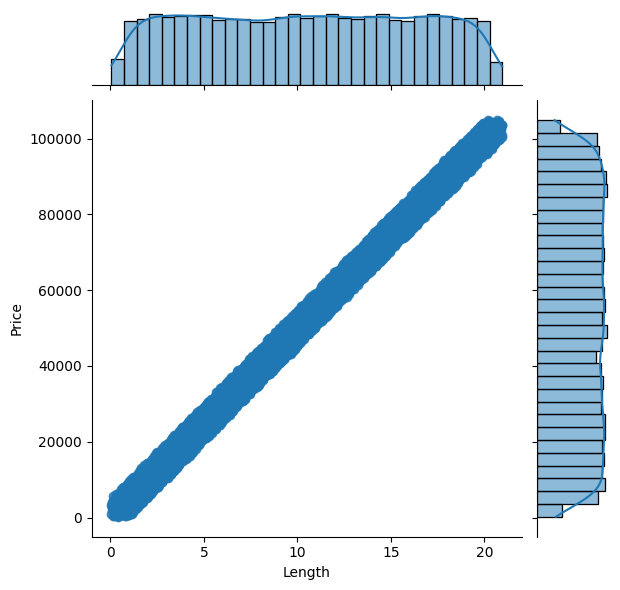

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


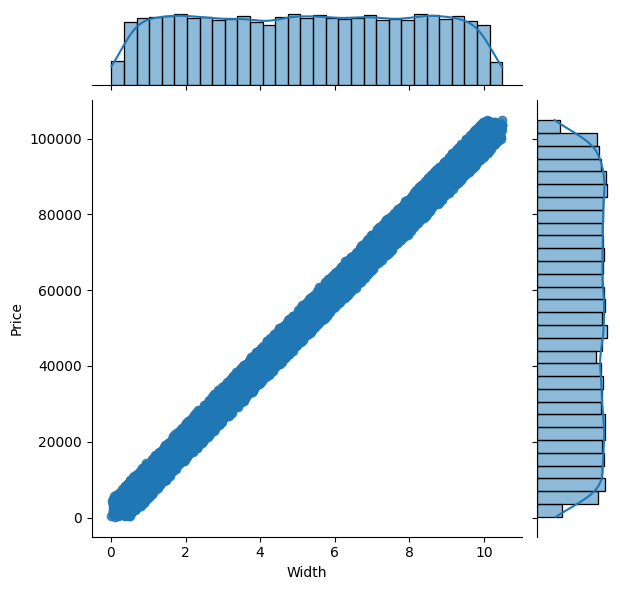

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


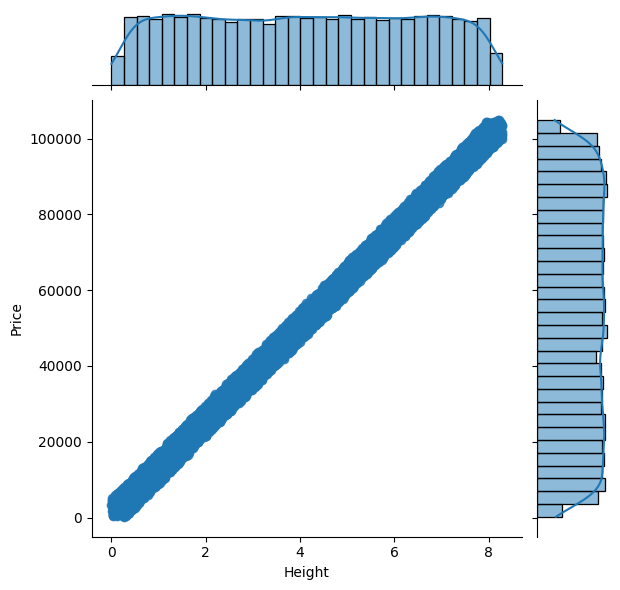

In [18]:
# Joint plots for numeric variables
for col in numeric_columns:
    sns.jointplot(x=col, y='Price', data=df, kind='reg')
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

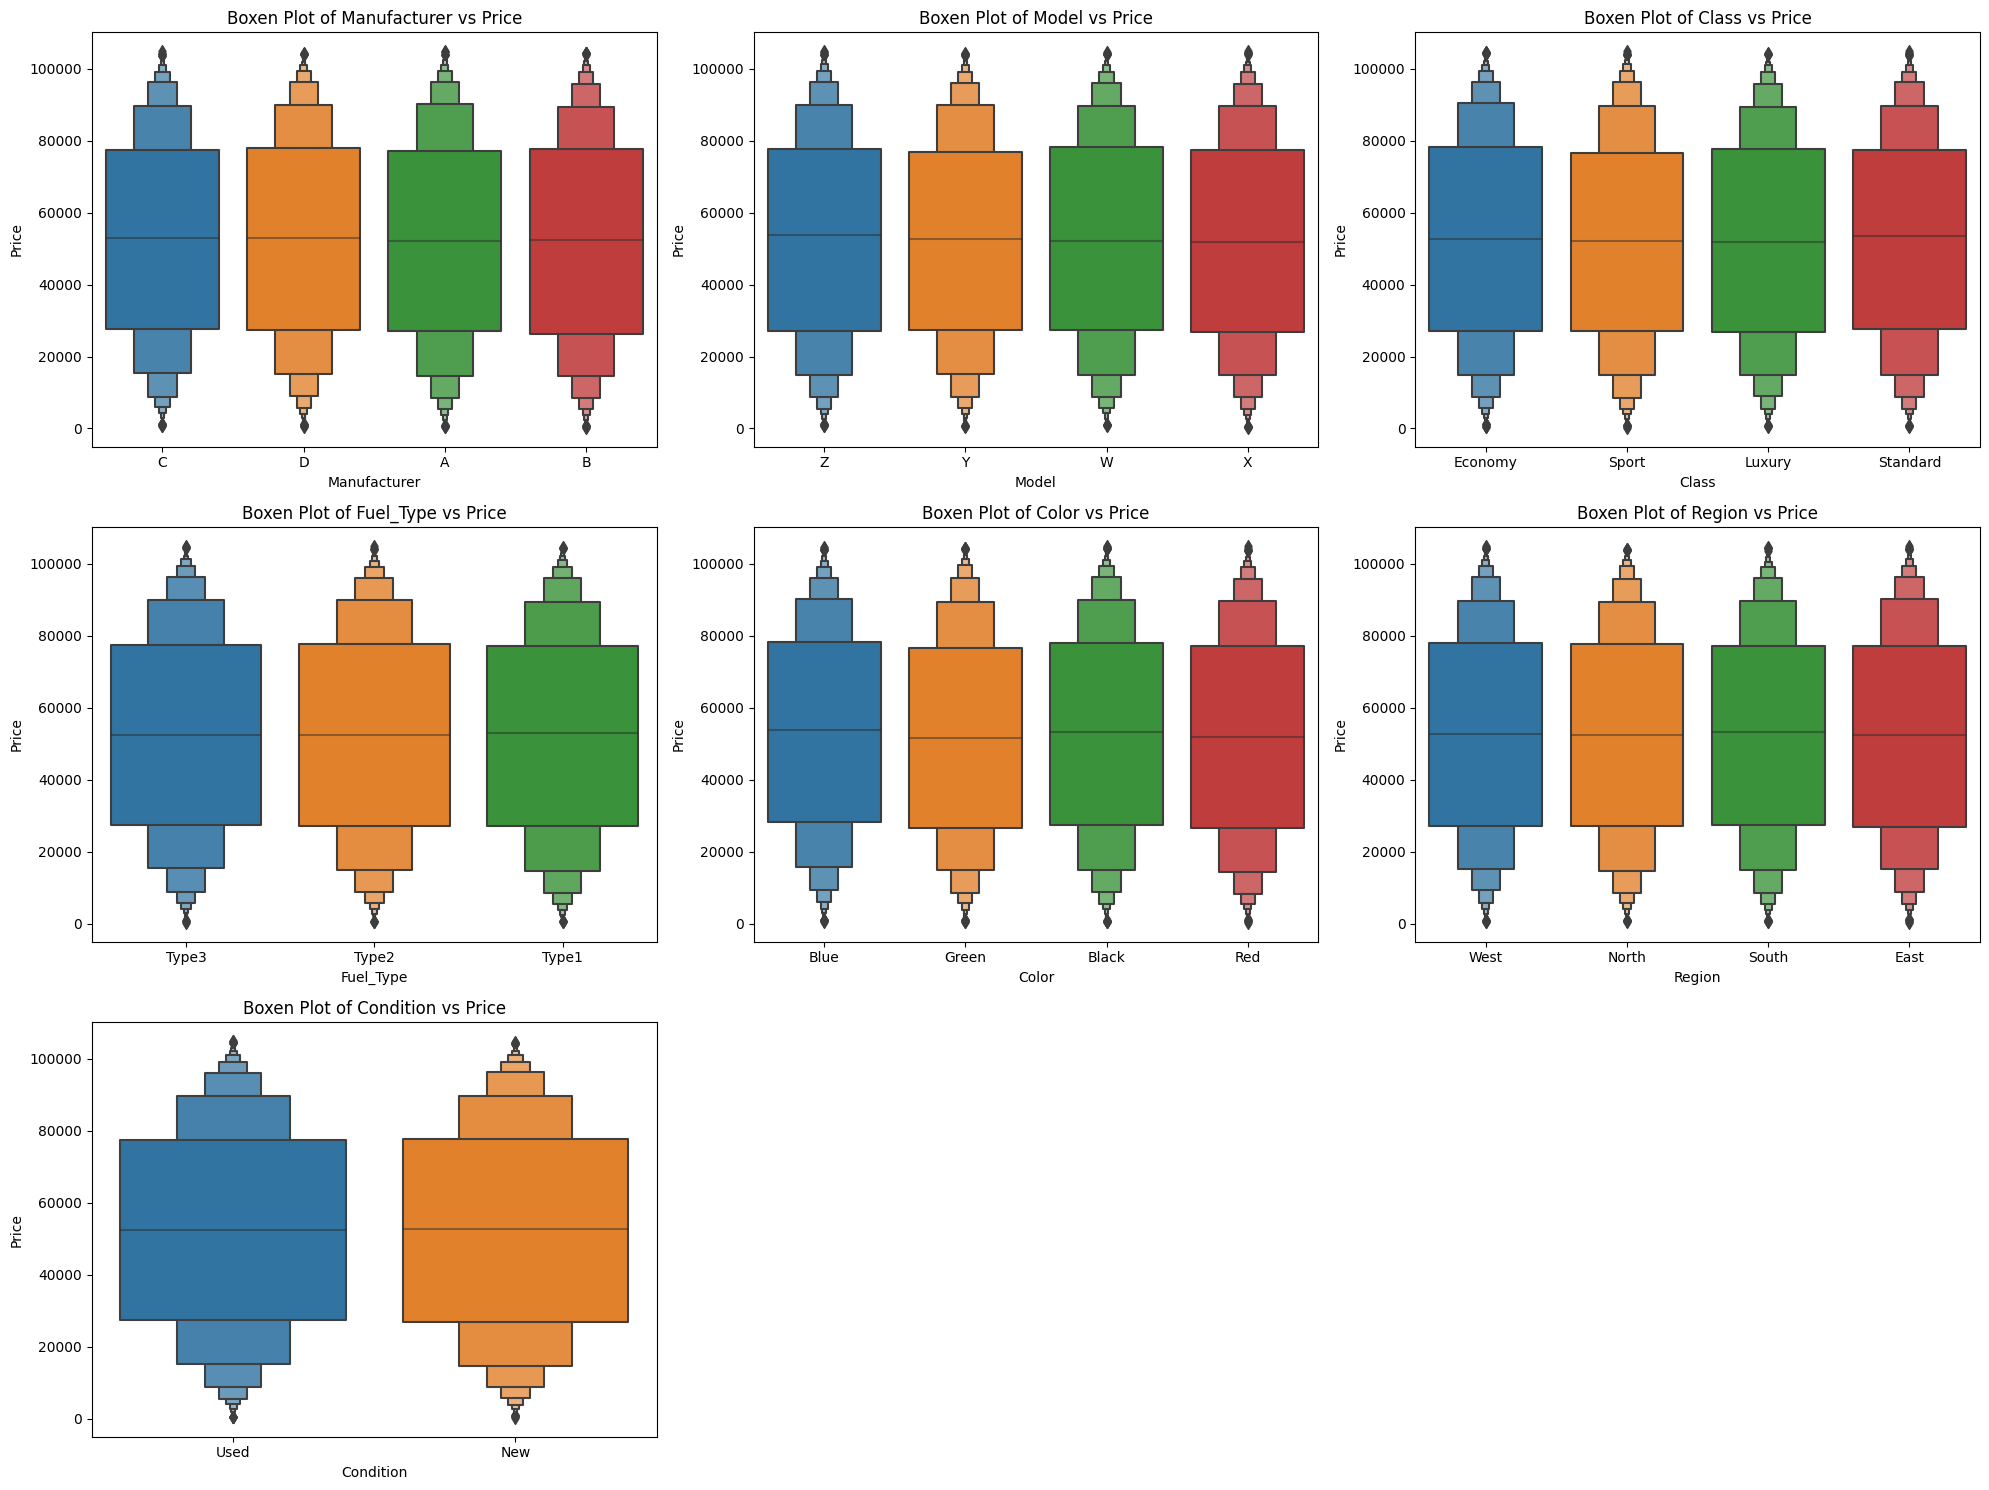

In [19]:
# Boxen plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxenplot(x=col, y='Price', data=df)
    plt.title(f'Boxen Plot of {col} vs Price')
plt.tight_layout()
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

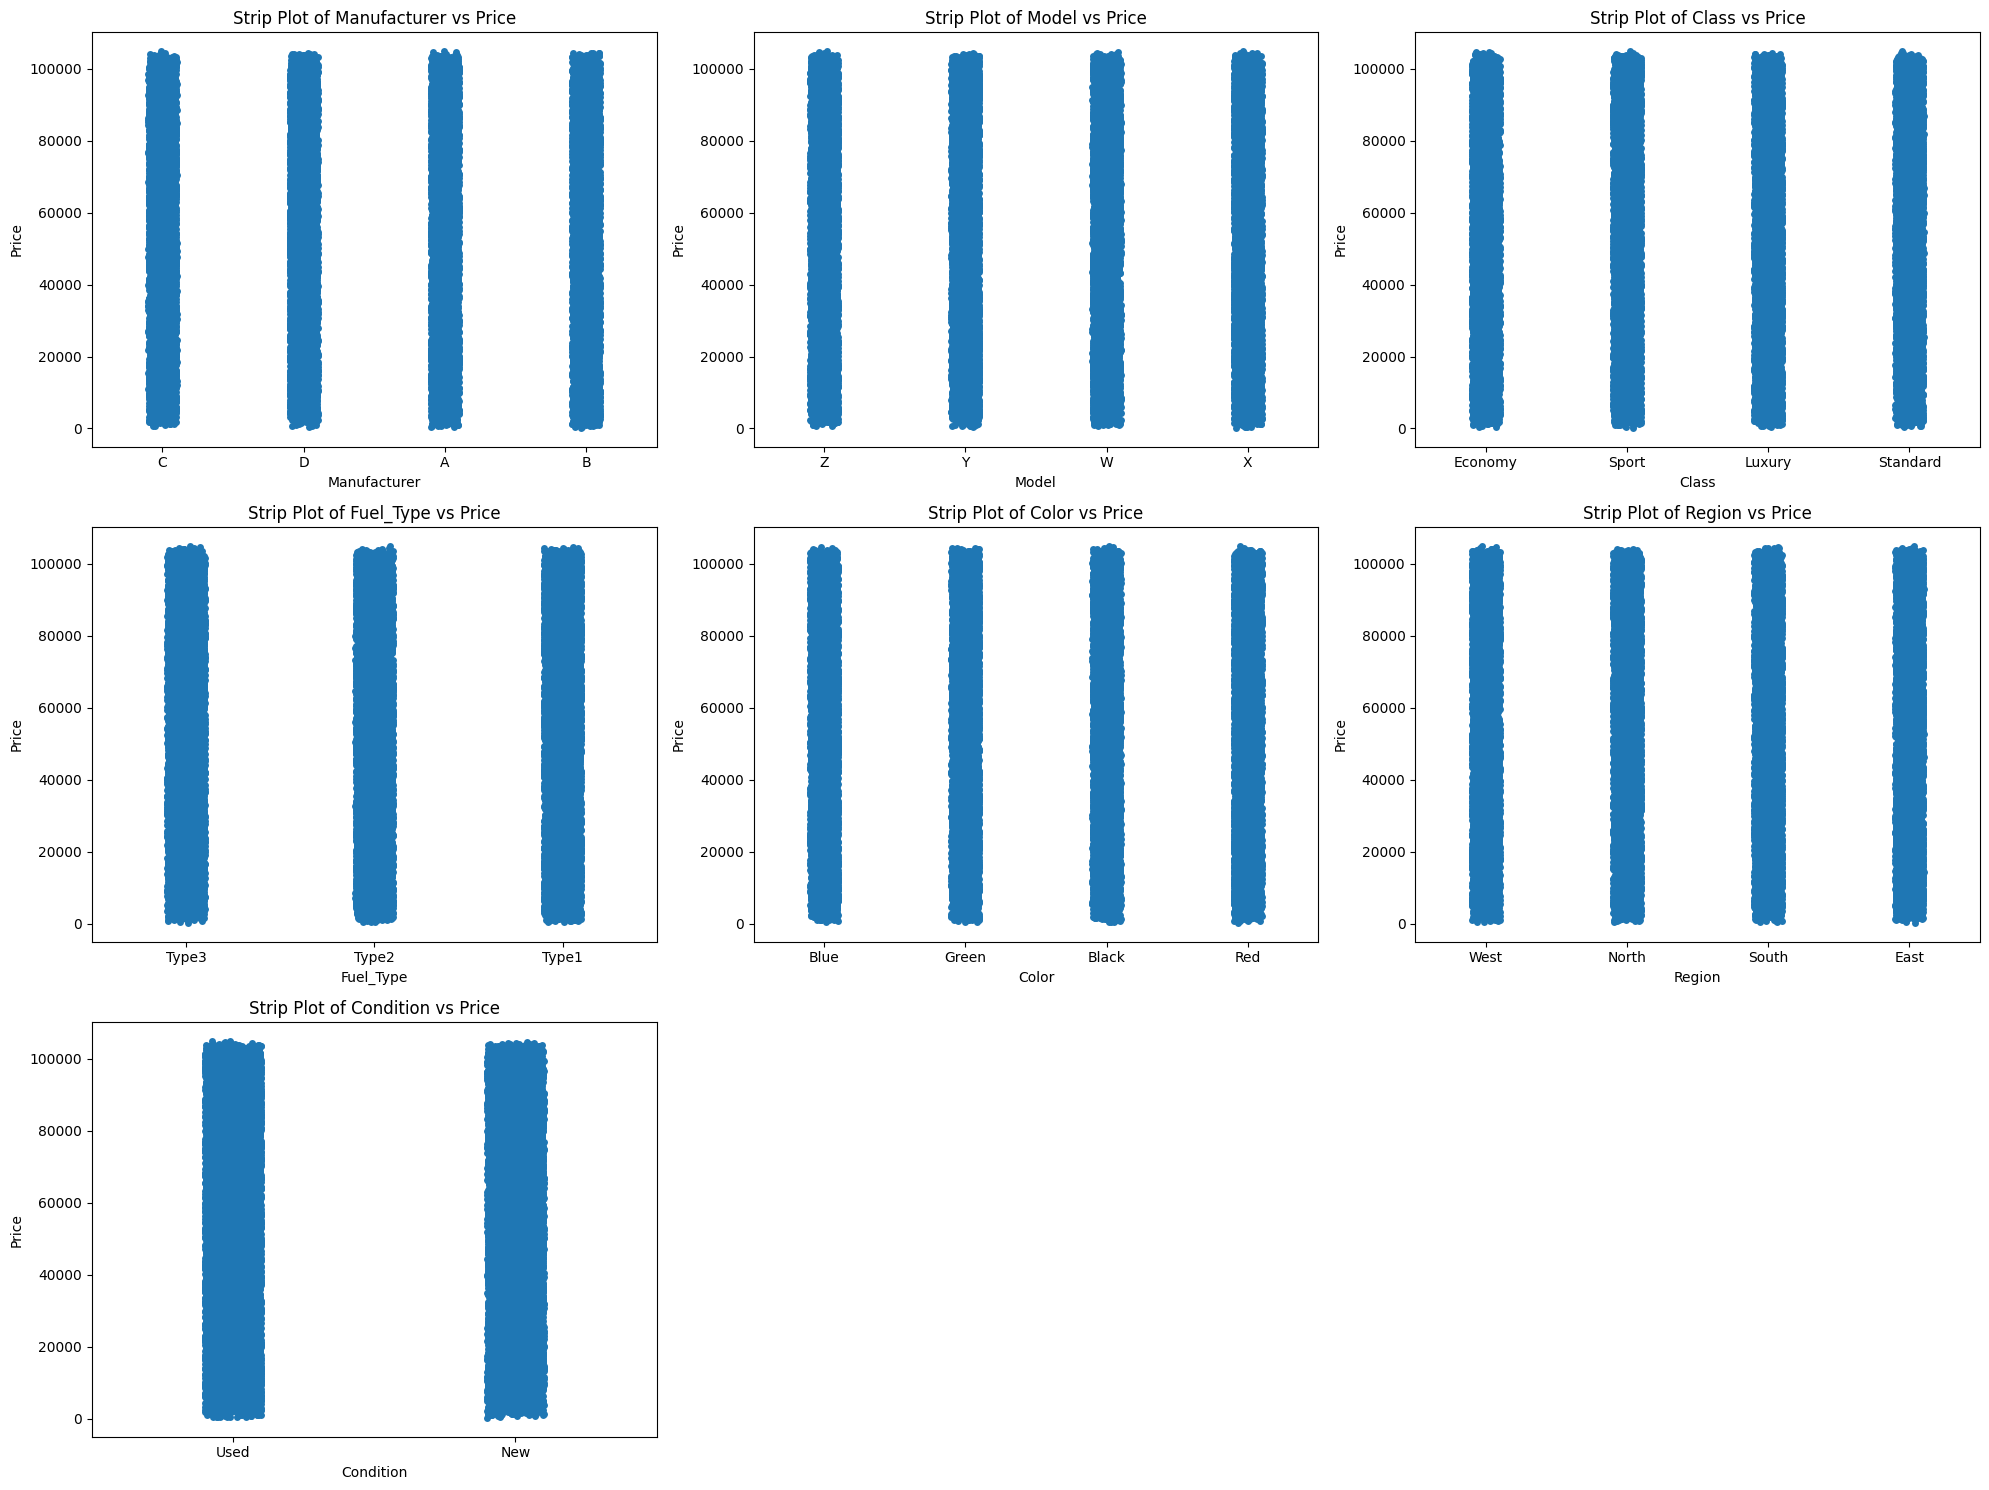

In [20]:
# Strip plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.stripplot(x=col, y='Price', data=df)
    plt.title(f'Strip Plot of {col} vs Price')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

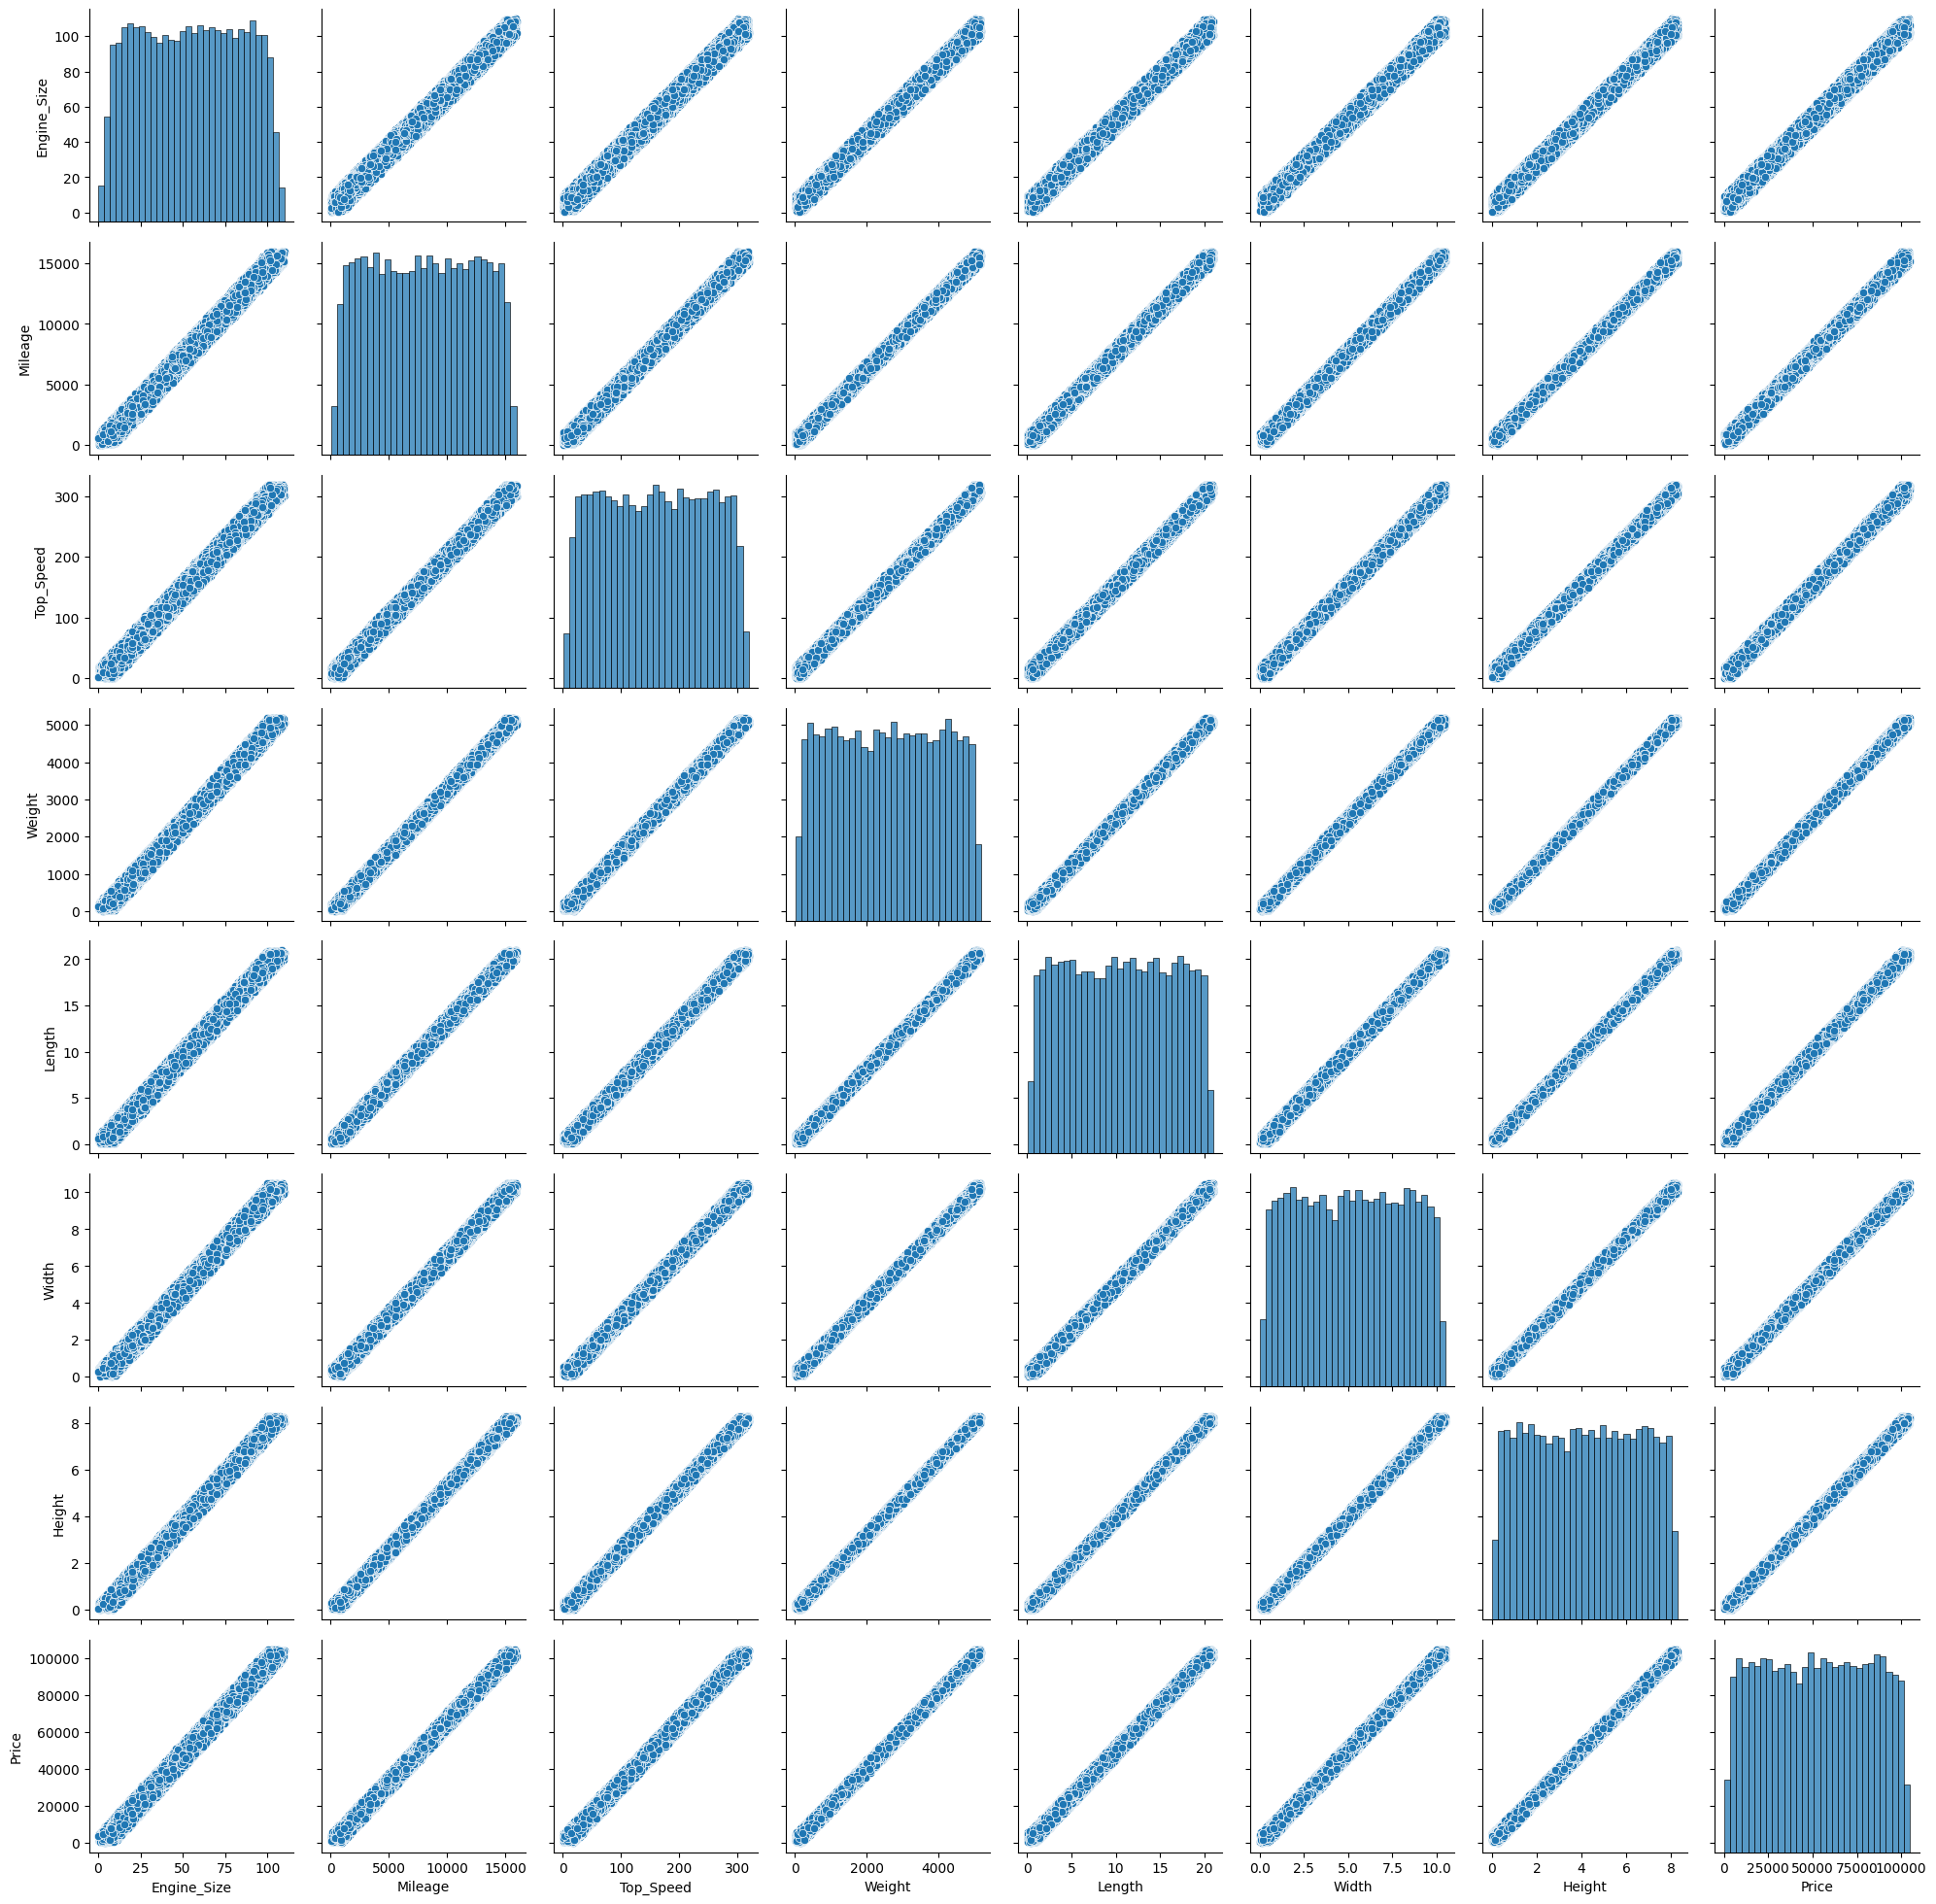

In [21]:
# PairGrid for detailed pair plots
g = sns.PairGrid(df[numeric_columns + ['Price']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()